In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import glob
from IPython.display import display, HTML
from pandas import Series

In [2]:
xsu = pd.DataFrame({'Category': ['Average Speed', 'Calories Burned', 'Distance', 'Elevation', 'Max Speed', 'Temperature', 'Time'], 
                   'Unit': ['kph', 'kcal', 'km', 'm', 'kph', 'Celsius', 'sec']}).set_index('Category')
xsu_script = xsu.to_html()
xsu #xoss_strava unit
#print(xsu_script)

,Unit
Category,
Average Speed,kph
Calories Burned,kcal
Distance,km
Elevation,m
Max Speed,kph
Temperature,Celsius
Time,sec


In [3]:
xslist = [] #xoss_strava list of dataframes
for xsgather in glob.glob('data/*_strava.csv'): #xoss_strava gather records
    print(f'Loading {xsgather}')
    xsmerged = pd.read_csv(xsgather, parse_dates=["Date"]).sort_index() #xoss_strava merged records
    xslist.append(xsmerged)

print('Number of Files Loaded: ',len(xslist))

xst = pd.concat(xslist).set_index('Date') #xoss_strava total
xsst = xst.reindex(sorted(xst.columns), axis=1) #xoss_strava sorted total
xsst.head()

Loading data\20240623_strava.csv
Loading data\20240624_strava.csv
Loading data\20240626_strava.csv
Loading data\20240702_strava.csv
Loading data\20240703_strava.csv
Loading data\20240709_strava.csv
Loading data\20240710_strava.csv
Loading data\20240717_strava.csv
Loading data\20240730_strava.csv
Loading data\20240731_strava.csv
Loading data\20240807_strava.csv
Loading data\20240814_strava.csv
Loading data\20240821_strava.csv
Loading data\20240823_strava.csv
Loading data\20240917_strava.csv
Loading data\20240918_strava.csv
Loading data\20240925_strava.csv
Loading data\20241002_strava.csv
Loading data\20241003_strava.csv
Loading data\20241009_strava.csv
Loading data\20241231_strava.csv
Number of Files Loaded:  21


,Average Speed,Calories Burned,Distance,Elevation,Max Speed,Purpose,Temperature,Time
Date,,,,,,,,
2024-06-23,22.0,201,6.72,30,37.9,Testing,33,1101
2024-06-24,18.2,1853,65.64,443,41.3,Training,34,12972
2024-06-26,18.0,214,7.85,30,33.6,Bike to Work,34,1568
2024-06-26,14.9,107,4.01,24,37.2,Home from Work,28,969
2024-07-02,18.4,2015,71.44,633,43.3,Training,36,13979


In [37]:
dg = xsst.groupby("Purpose") #draft group
xsg = dg.size().reset_index().rename(columns={0: 'Count'}) #xoss_strava group
tc = xsg['Count'].sum() #total count

xsc = pd.DataFrame({'Inventory' : ['Total Records', 'Files Loaded'], 'Count' : [tc, len(xslist)]}).set_index('Inventory')
xsc #relive count
xsc_script = xsc.to_html()
#xsc_script
xsc
xsg

,Purpose,Count
0,Bike to Work,12
1,Home from Work,12
2,Testing,3
3,Training,6


In [38]:
xsave = pd.pivot_table(data=xsst,index=['Purpose']).round(2) 
xsave.columns = pd.MultiIndex.from_product([['Ave'], ["Average Speed", "Calories Burned", "Distance", "Elevation", "Max Speed", "Temperature", "Time"]])
xsave_script = xsave.to_html()
#xsave_script
xsave #xoss_strava average per purpose

Ave                                               \
               Average Speed Calories Burned Distance Elevation Max Speed   
Purpose                                                                     
Bike to Work           16.49          270.08     9.93     88.00     33.90   
Home from Work         14.88          168.33     6.16     34.75     37.22   
Testing                19.03          213.67     7.39     22.00     35.70   
Training               18.17         2027.83    71.96    568.50     41.27   

                                      
               Temperature      Time  
Purpose                               
Bike to Work         39.58   2168.17  
Home from Work       31.00   1497.25  
Testing              31.33   1442.67  
Training             34.17  14237.67

In [6]:
xssum = xsst[["Calories Burned", "Distance", "Elevation", "Time"]].sum().reset_index().rename(columns={0: 'Sum', 'index': 'Category'}).round(2).set_index('Category')
xssum_script = xssum.to_html()
#xssum_script
xssum #xoss_strava sum all purpose

,Sum
Category,
Calories Burned,18069.00
Distance,646.99
Elevation,4950.00
Time,133739.00


In [7]:
p1 = dg.get_group("Bike to Work").set_index('Purpose')
xsminp1 = p1[["Average Speed", "Calories Burned", "Distance", "Elevation", "Max Speed", "Temperature", "Time"]].min().reset_index().rename(columns={0: 'Bike to Work', 'index': 'Category'}).round(2).set_index('Category') #xoss_strava min bike to work purpose
p2 = dg.get_group("Home from Work").set_index('Purpose')
xsminp2 = p2[["Average Speed", "Calories Burned", "Distance", "Elevation", "Max Speed", "Temperature", "Time"]].min().reset_index().rename(columns={0: 'Home from Work', 'index': 'Category'}).round(2).set_index('Category') #xoss_strava min home from work purpose
p3 = dg.get_group("Testing").set_index('Purpose')
xsminp3 = p3[["Average Speed", "Calories Burned", "Distance", "Elevation", "Max Speed", "Temperature", "Time"]].min().reset_index().rename(columns={0: 'Testing', 'index': 'Category'}).round(2).set_index('Category') #xoss_strava min testing purpose
p4 = dg.get_group("Training").set_index('Purpose')
xsminp4 = p4[["Average Speed", "Calories Burned", "Distance", "Elevation", "Max Speed", "Temperature", "Time"]].min().reset_index().rename(columns={0: 'Training', 'index': 'Category'}).round(2).set_index('Category') #xoss_strava min training purpose
xsminlist = [xsminp1, xsminp2, xsminp3, xsminp4]
xsmint = pd.concat(xsminlist, axis=1)
xsmint.columns = pd.MultiIndex.from_product([['Min'], ["Bike to Work", "Home from Work", "Testing", "Training"]])
xsmint #xoss_strava min total

p1 = dg.get_group("Bike to Work").set_index('Purpose')
xsmaxp1 = p1[["Average Speed", "Calories Burned", "Distance", "Elevation", "Max Speed", "Temperature", "Time"]].max().reset_index().rename(columns={0: 'Bike to Work', 'index': 'Category'}).round(2).set_index('Category') #xoss_strava max bike to work purpose
p2 = dg.get_group("Home from Work").set_index('Purpose')
xsmaxp2 = p2[["Average Speed", "Calories Burned", "Distance", "Elevation", "Max Speed", "Temperature", "Time"]].max().reset_index().rename(columns={0: 'Home from Work', 'index': 'Category'}).round(2).set_index('Category') #xoss_strava max home from work purpose
p3 = dg.get_group("Testing").set_index('Purpose')
xsmaxp3 = p3[["Average Speed", "Calories Burned", "Distance", "Elevation", "Max Speed", "Temperature", "Time"]].max().reset_index().rename(columns={0: 'Testing', 'index': 'Category'}).round(2).set_index('Category') #xoss_strava max testing purpose
p4 = dg.get_group("Training").set_index('Purpose')
xsmaxp4 = p4[["Average Speed", "Calories Burned", "Distance", "Elevation", "Max Speed", "Temperature", "Time"]].max().reset_index().rename(columns={0: 'Training', 'index': 'Category'}).round(2).set_index('Category') #xoss_strava max training purpose
xsmaxlist = [xsmaxp1, xsmaxp2, xsmaxp3, xsmaxp4]
xsmaxt = pd.concat(xsmaxlist, axis=1)
xsmaxt.columns = pd.MultiIndex.from_product([['Max'], ["Bike to Work", "Home from Work", "Testing", "Training"]])
xsmaxt #xoss_strava max total

xsminmax = pd.concat ([xsmint, xsmaxt], axis=1)
xsminmax_script = xsminmax.to_html()
#xsminmax_script
xsminmax

Min                                            Max  \
                Bike to Work Home from Work  Testing  Training Bike to Work   
Category                                                                      
Average Speed           15.4          13.50    15.20     16.10        18.00   
Calories Burned        174.0         107.00   201.00   1559.00       449.00   
Distance                 6.5           4.01     6.72     55.98        16.24   
Elevation               30.0          24.00    17.00    443.00       125.00   
Max Speed               28.7          34.10    33.30     36.20        39.80   
Temperature             31.0          27.00    29.00     32.00        46.00   
Time                  1504.0         937.00  1101.00  12488.00      3297.00   

                                                 
                Home from Work Testing Training  
Category                                         
Average Speed            16.80    22.0     19.8  
Calories Burned         273.00   225.0   2397.0  
Distance                 10.11     7.8     84.8  
Elevation                40.00    30.0    794.0  
Max Speed                40.50    37.9     43.3  
Temperature              33.00    33.0     36.0  
Time                   2523.00  1812.0  17028.0

In [8]:
as_b2w = xsst.loc[xsst["Purpose"] == "Bike to Work"].loc[:,"Average Speed"]
as_b2wd = as_b2w.to_frame(name="Bike to Work")
as_hfw = xsst.loc[xsst["Purpose"] == "Home from Work"].loc[:,"Average Speed"]
as_hfwd = as_hfw.to_frame(name="Home from Work")
as_tes = xsst.loc[xsst["Purpose"] == "Testing"].loc[:,"Average Speed"]
as_tesd = as_tes.to_frame(name="Testing")
as_tra = xsst.loc[xsst["Purpose"] == "Training"].loc[:,"Average Speed"]
as_trad = as_tra.to_frame(name="Training")
aslist = [as_b2wd, as_hfwd, as_tesd, as_trad]
ast = pd.concat(aslist, axis=1).fillna(0)
ast.columns = pd.MultiIndex.from_product([["Average Speed"], ["Bike to Work", "Home from Work", "Testing", "Training"]])

ast.head() #average speed total

Average Speed                                
            Bike to Work Home from Work Testing Training
Date                                                    
2024-06-23           0.0            0.0    22.0      0.0
2024-06-24           0.0            0.0     0.0     18.2
2024-06-26          18.0           14.9     0.0      0.0
2024-07-02           0.0            0.0     0.0     18.4
2024-07-03          15.6           14.7     0.0      0.0

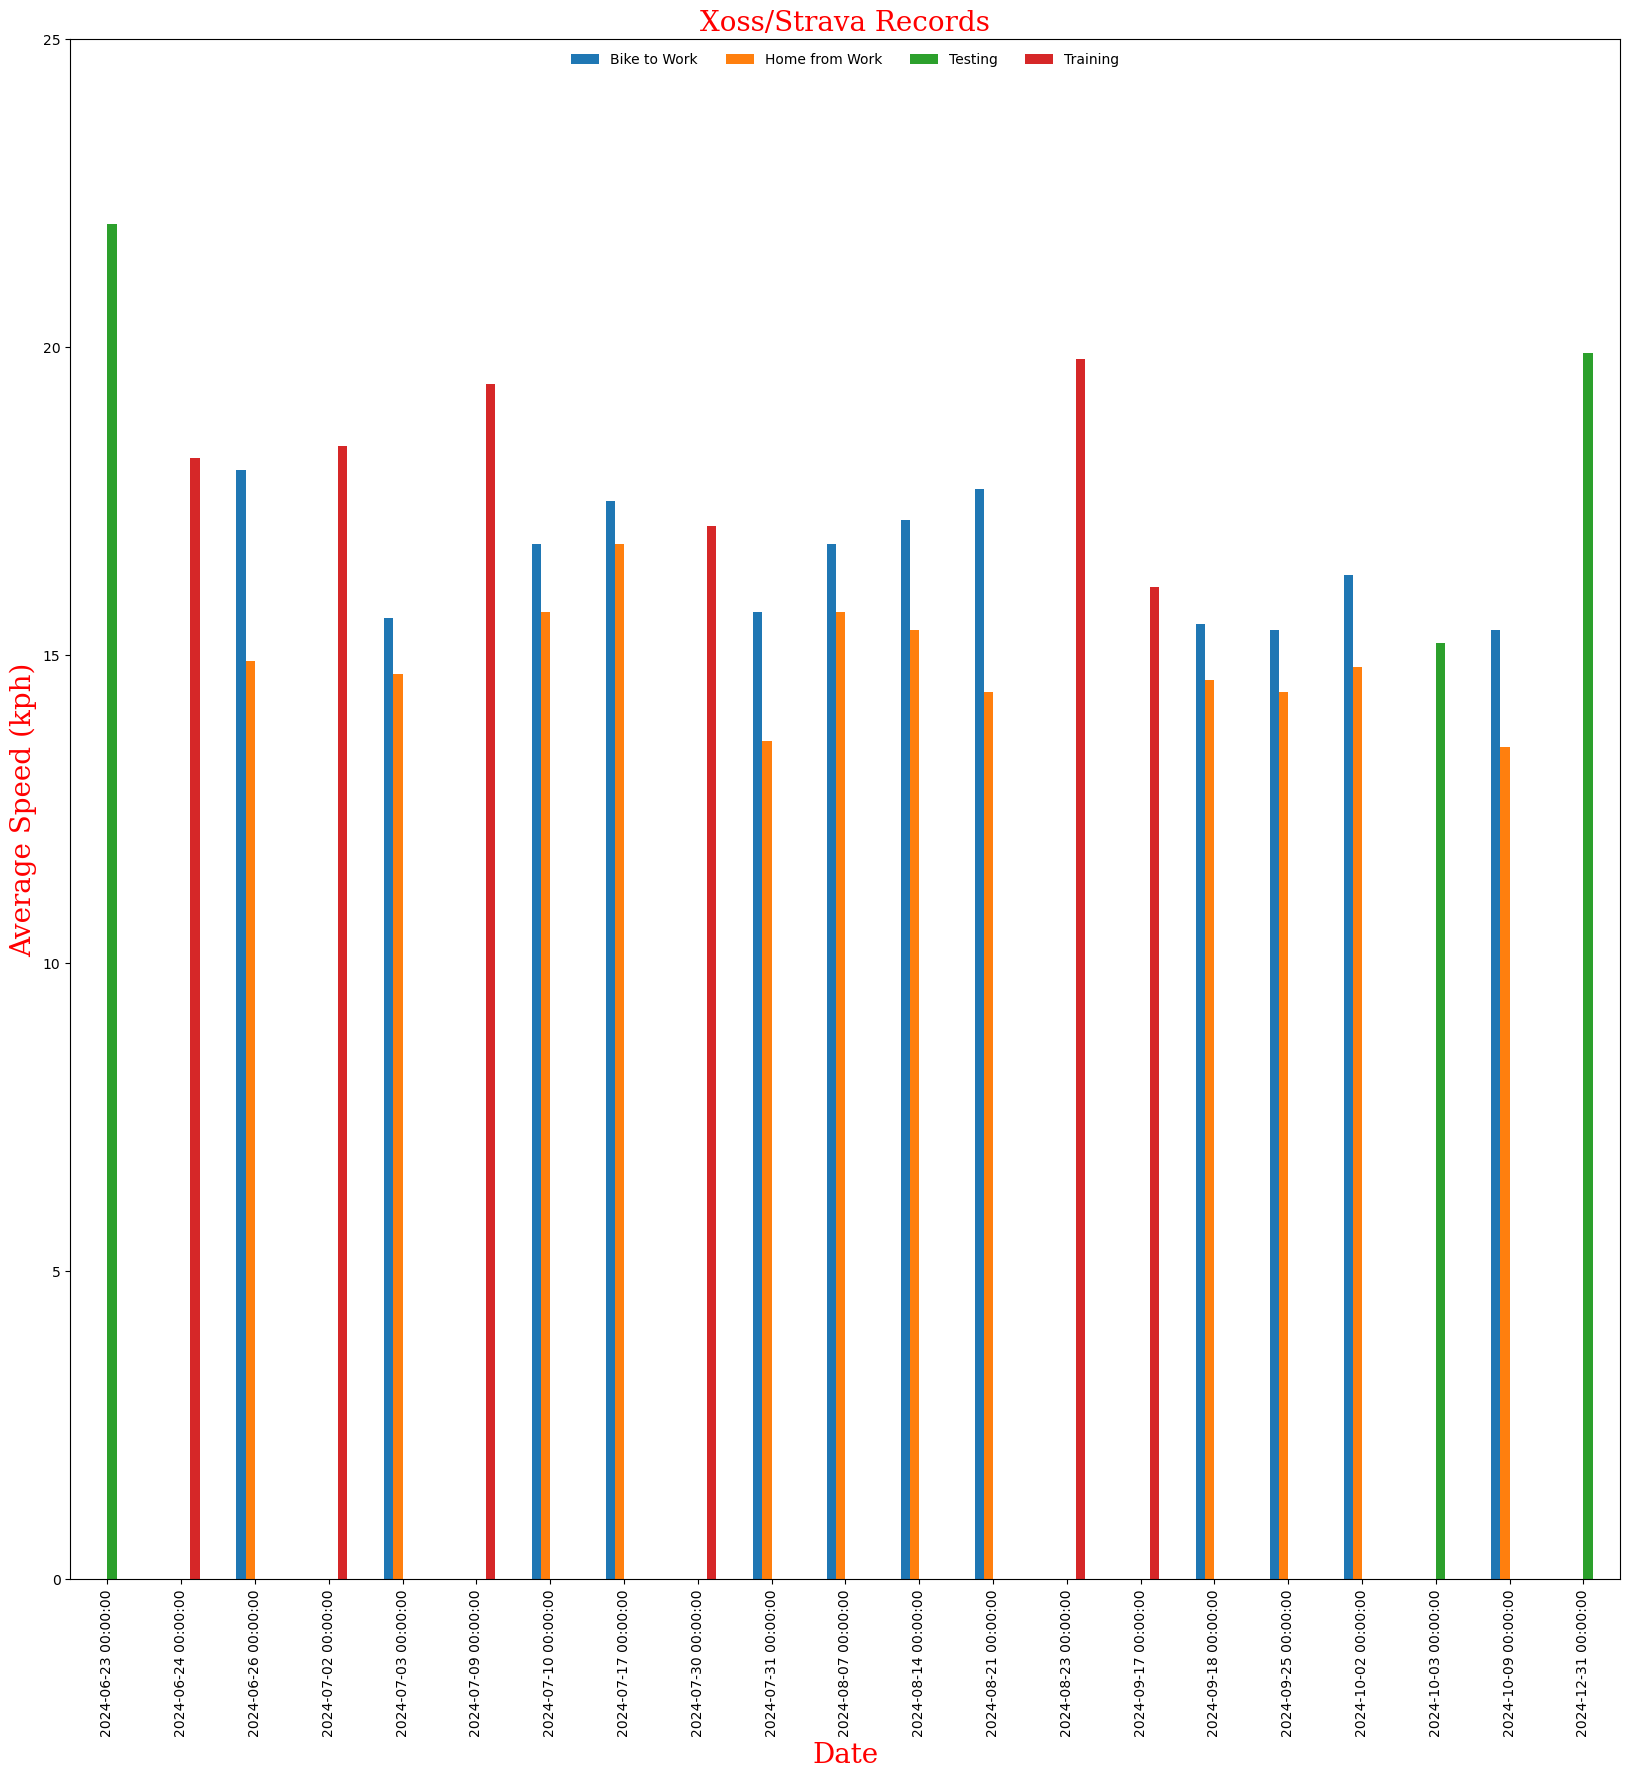

In [9]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
ast.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Testing", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=20)
plt.title('Xoss/Strava Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Average Speed (kph)', fontdict=f1)
plt.ylim(0, 25)
plt.savefig("fig/ast_xoss_strava.png")
plt.show()

In [10]:
cb_b2w = xsst.loc[xsst["Purpose"] == "Bike to Work"].loc[:,"Calories Burned"]
cb_b2wd = cb_b2w.to_frame(name="Bike to Work")
cb_hfw = xsst.loc[xsst["Purpose"] == "Home from Work"].loc[:,"Calories Burned"]
cb_hfwd = cb_hfw.to_frame(name="Home from Work")
cb_tes = xsst.loc[xsst["Purpose"] == "Testing"].loc[:,"Calories Burned"]
cb_tesd = cb_tes.to_frame(name="Testing")
cb_tra = xsst.loc[xsst["Purpose"] == "Training"].loc[:,"Calories Burned"]
cb_trad = cb_tra.to_frame(name="Training")
cblist = [cb_b2wd, cb_hfwd, cb_tesd, cb_trad]
cbt = pd.concat(cblist, axis=1).fillna(0)
cbt.columns = pd.MultiIndex.from_product([["Calories Burned"], ["Bike to Work", "Home from Work", "Testing", "Training"]])

cbt.head() #calories burned total

Calories Burned                                
              Bike to Work Home from Work Testing Training
Date                                                      
2024-06-23             0.0            0.0   201.0      0.0
2024-06-24             0.0            0.0     0.0   1853.0
2024-06-26           214.0          107.0     0.0      0.0
2024-07-02             0.0            0.0     0.0   2015.0
2024-07-03           174.0          173.0     0.0      0.0

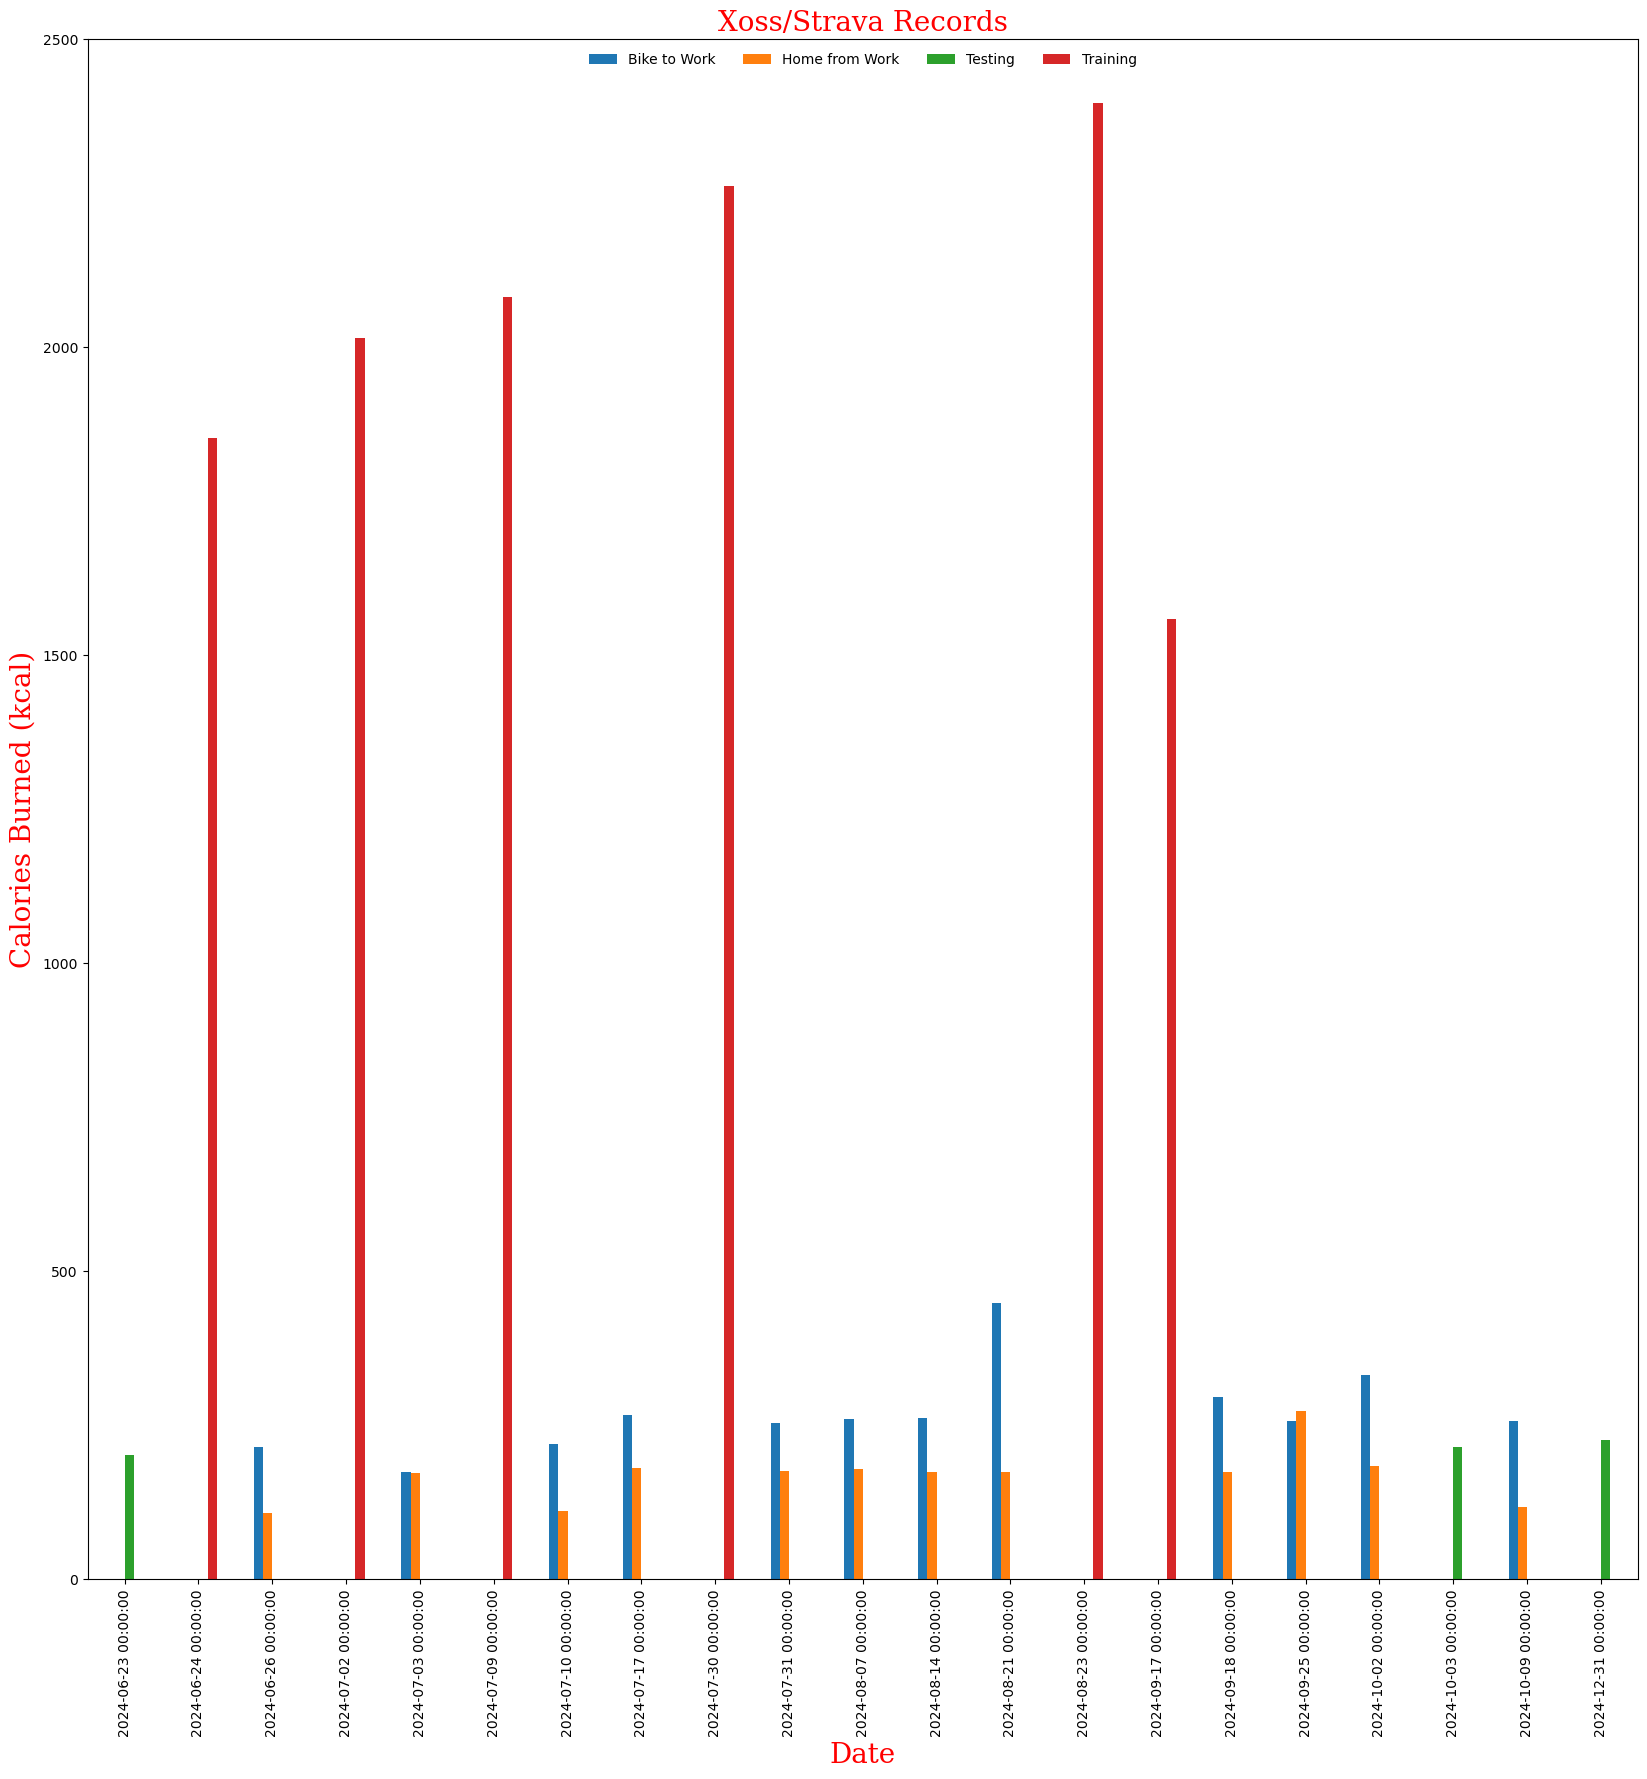

In [11]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
cbt.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Testing", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=20)
plt.title('Xoss/Strava Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Calories Burned (kcal)', fontdict=f1)
plt.ylim(0, 2500)
plt.savefig("fig/cbt_xoss_strava.png")
plt.show()

In [12]:
d_b2w = xsst.loc[xsst["Purpose"] == "Bike to Work"].loc[:,"Distance"]
d_b2wd = d_b2w.to_frame(name="Bike to Work")
d_hfw = xsst.loc[xsst["Purpose"] == "Home from Work"].loc[:,"Distance"]
d_hfwd = d_hfw.to_frame(name="Home from Work")
d_tes = xsst.loc[xsst["Purpose"] == "Testing"].loc[:,"Distance"]
d_tesd = d_tes.to_frame(name="Testing")
d_tra = xsst.loc[xsst["Purpose"] == "Training"].loc[:,"Distance"]
d_trad = d_tra.to_frame(name="Training")
dlist = [d_b2wd, d_hfwd, d_tesd, d_trad]
dt = pd.concat(dlist, axis=1).fillna(0)
dt.columns = pd.MultiIndex.from_product([["Distance"], ["Bike to Work", "Home from Work", "Testing", "Training"]])
dt.head() #distance total

Distance                                
           Bike to Work Home from Work Testing Training
Date                                                   
2024-06-23         0.00           0.00    6.72     0.00
2024-06-24         0.00           0.00    0.00    65.64
2024-06-26         7.85           4.01    0.00     0.00
2024-07-02         0.00           0.00    0.00    71.44
2024-07-03         6.50           6.46    0.00     0.00

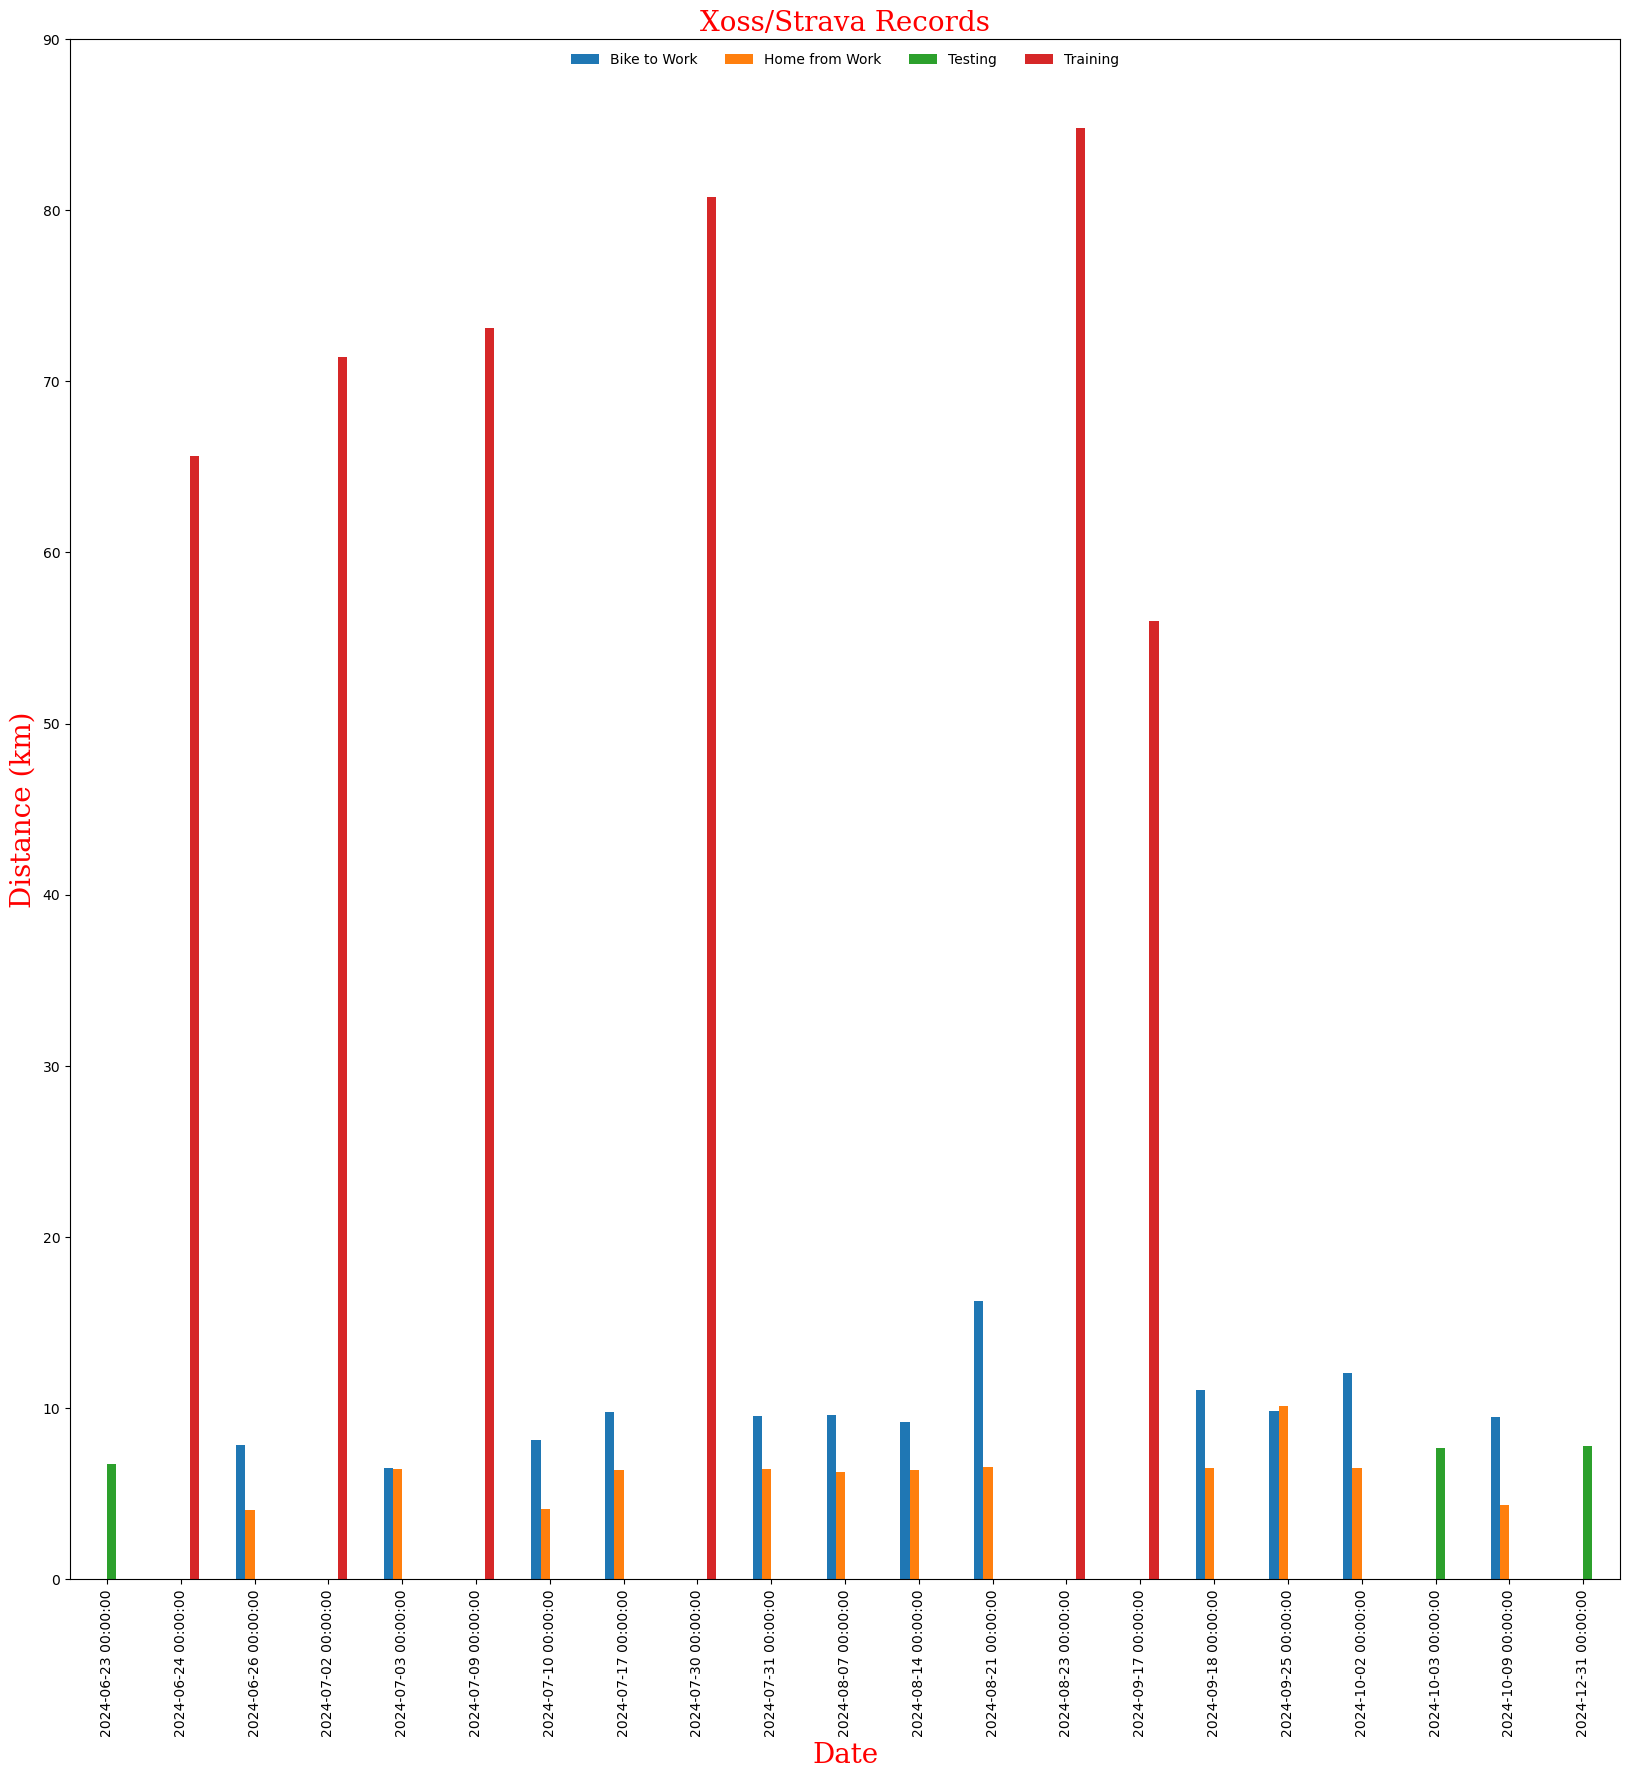

In [13]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
dt.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Testing", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=20)
plt.title('Xoss/Strava Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Distance (km)', fontdict=f1)
plt.ylim(0, 90)
plt.savefig("fig/dt_xoss_strava.png")
plt.show()

In [14]:
e_b2w = xsst.loc[xsst["Purpose"] == "Bike to Work"].loc[:,"Elevation"]
e_b2wd = e_b2w.to_frame(name="Bike to Work")
e_hfw = xsst.loc[xsst["Purpose"] == "Home from Work"].loc[:,"Elevation"]
e_hfwd = e_hfw.to_frame(name="Home from Work")
e_tes = xsst.loc[xsst["Purpose"] == "Testing"].loc[:,"Elevation"]
e_tesd = e_tes.to_frame(name="Testing")
e_tra = xsst.loc[xsst["Purpose"] == "Training"].loc[:,"Elevation"]
e_trad = e_tra.to_frame(name="Training")
elist = [e_b2wd, e_hfwd, e_tesd, e_trad]
et = pd.concat(elist, axis=1).fillna(0)
et.columns = pd.MultiIndex.from_product([["Elevation"], ["Bike to Work", "Home from Work", "Testing", "Training"]])
et.head() #elevation total

Elevation                                
           Bike to Work Home from Work Testing Training
Date                                                   
2024-06-23          0.0            0.0    30.0      0.0
2024-06-24          0.0            0.0     0.0    443.0
2024-06-26         30.0           24.0     0.0      0.0
2024-07-02          0.0            0.0     0.0    633.0
2024-07-03         67.0           38.0     0.0      0.0

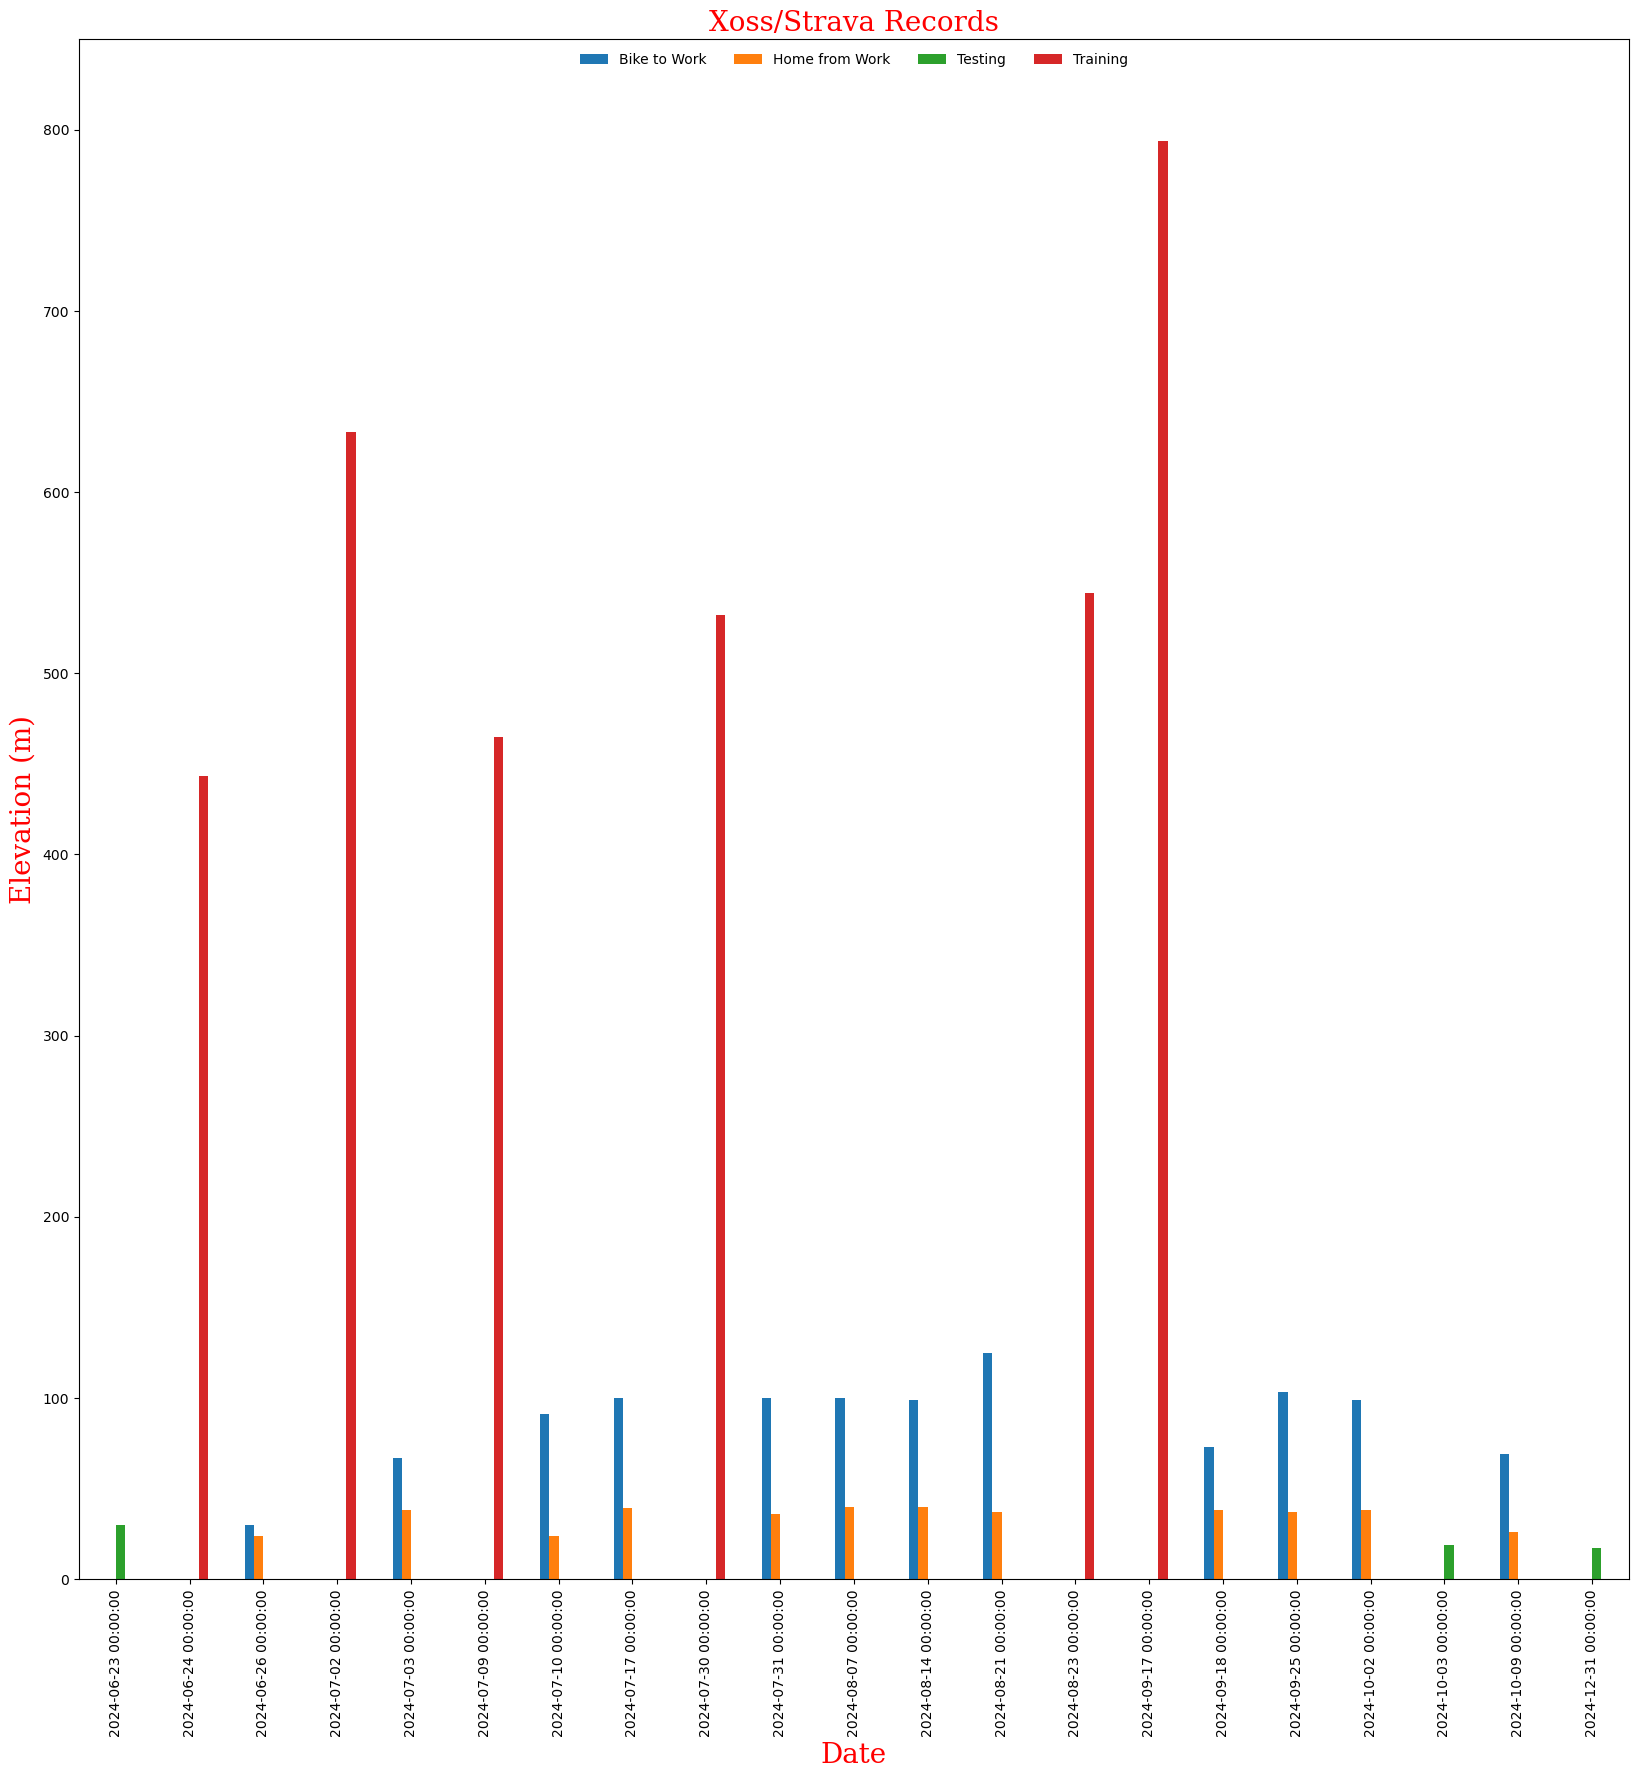

In [15]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
et.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Testing", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=20)
plt.title('Xoss/Strava Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Elevation (m)', fontdict=f1)
plt.ylim(0, 850)
plt.savefig("fig/et_xoss_strava.png")
plt.show()

In [16]:
ms_b2w = xsst.loc[xsst["Purpose"] == "Bike to Work"].loc[:,"Max Speed"]
ms_b2wd = ms_b2w.to_frame(name="Bike to Work")
ms_hfw = xsst.loc[xsst["Purpose"] == "Home from Work"].loc[:,"Max Speed"]
ms_hfwd = ms_hfw.to_frame(name="Home from Work")
ms_tes = xsst.loc[xsst["Purpose"] == "Testing"].loc[:,"Max Speed"]
ms_tesd = ms_tes.to_frame(name="Testing")
ms_tra = xsst.loc[xsst["Purpose"] == "Training"].loc[:,"Max Speed"]
ms_trad = ms_tra.to_frame(name="Training")
mslist = [ms_b2wd, ms_hfwd, ms_tesd, ms_trad]
mst = pd.concat(mslist, axis=1).fillna(0)
mst.columns = pd.MultiIndex.from_product([["Max Speed"], ["Bike to Work", "Home from Work", "Testing", "Training"]])

mst.head() #max speed total

Max Speed                                
           Bike to Work Home from Work Testing Training
Date                                                   
2024-06-23          0.0            0.0    37.9      0.0
2024-06-24          0.0            0.0     0.0     41.3
2024-06-26         33.6           37.2     0.0      0.0
2024-07-02          0.0            0.0     0.0     43.3
2024-07-03         31.1           35.2     0.0      0.0

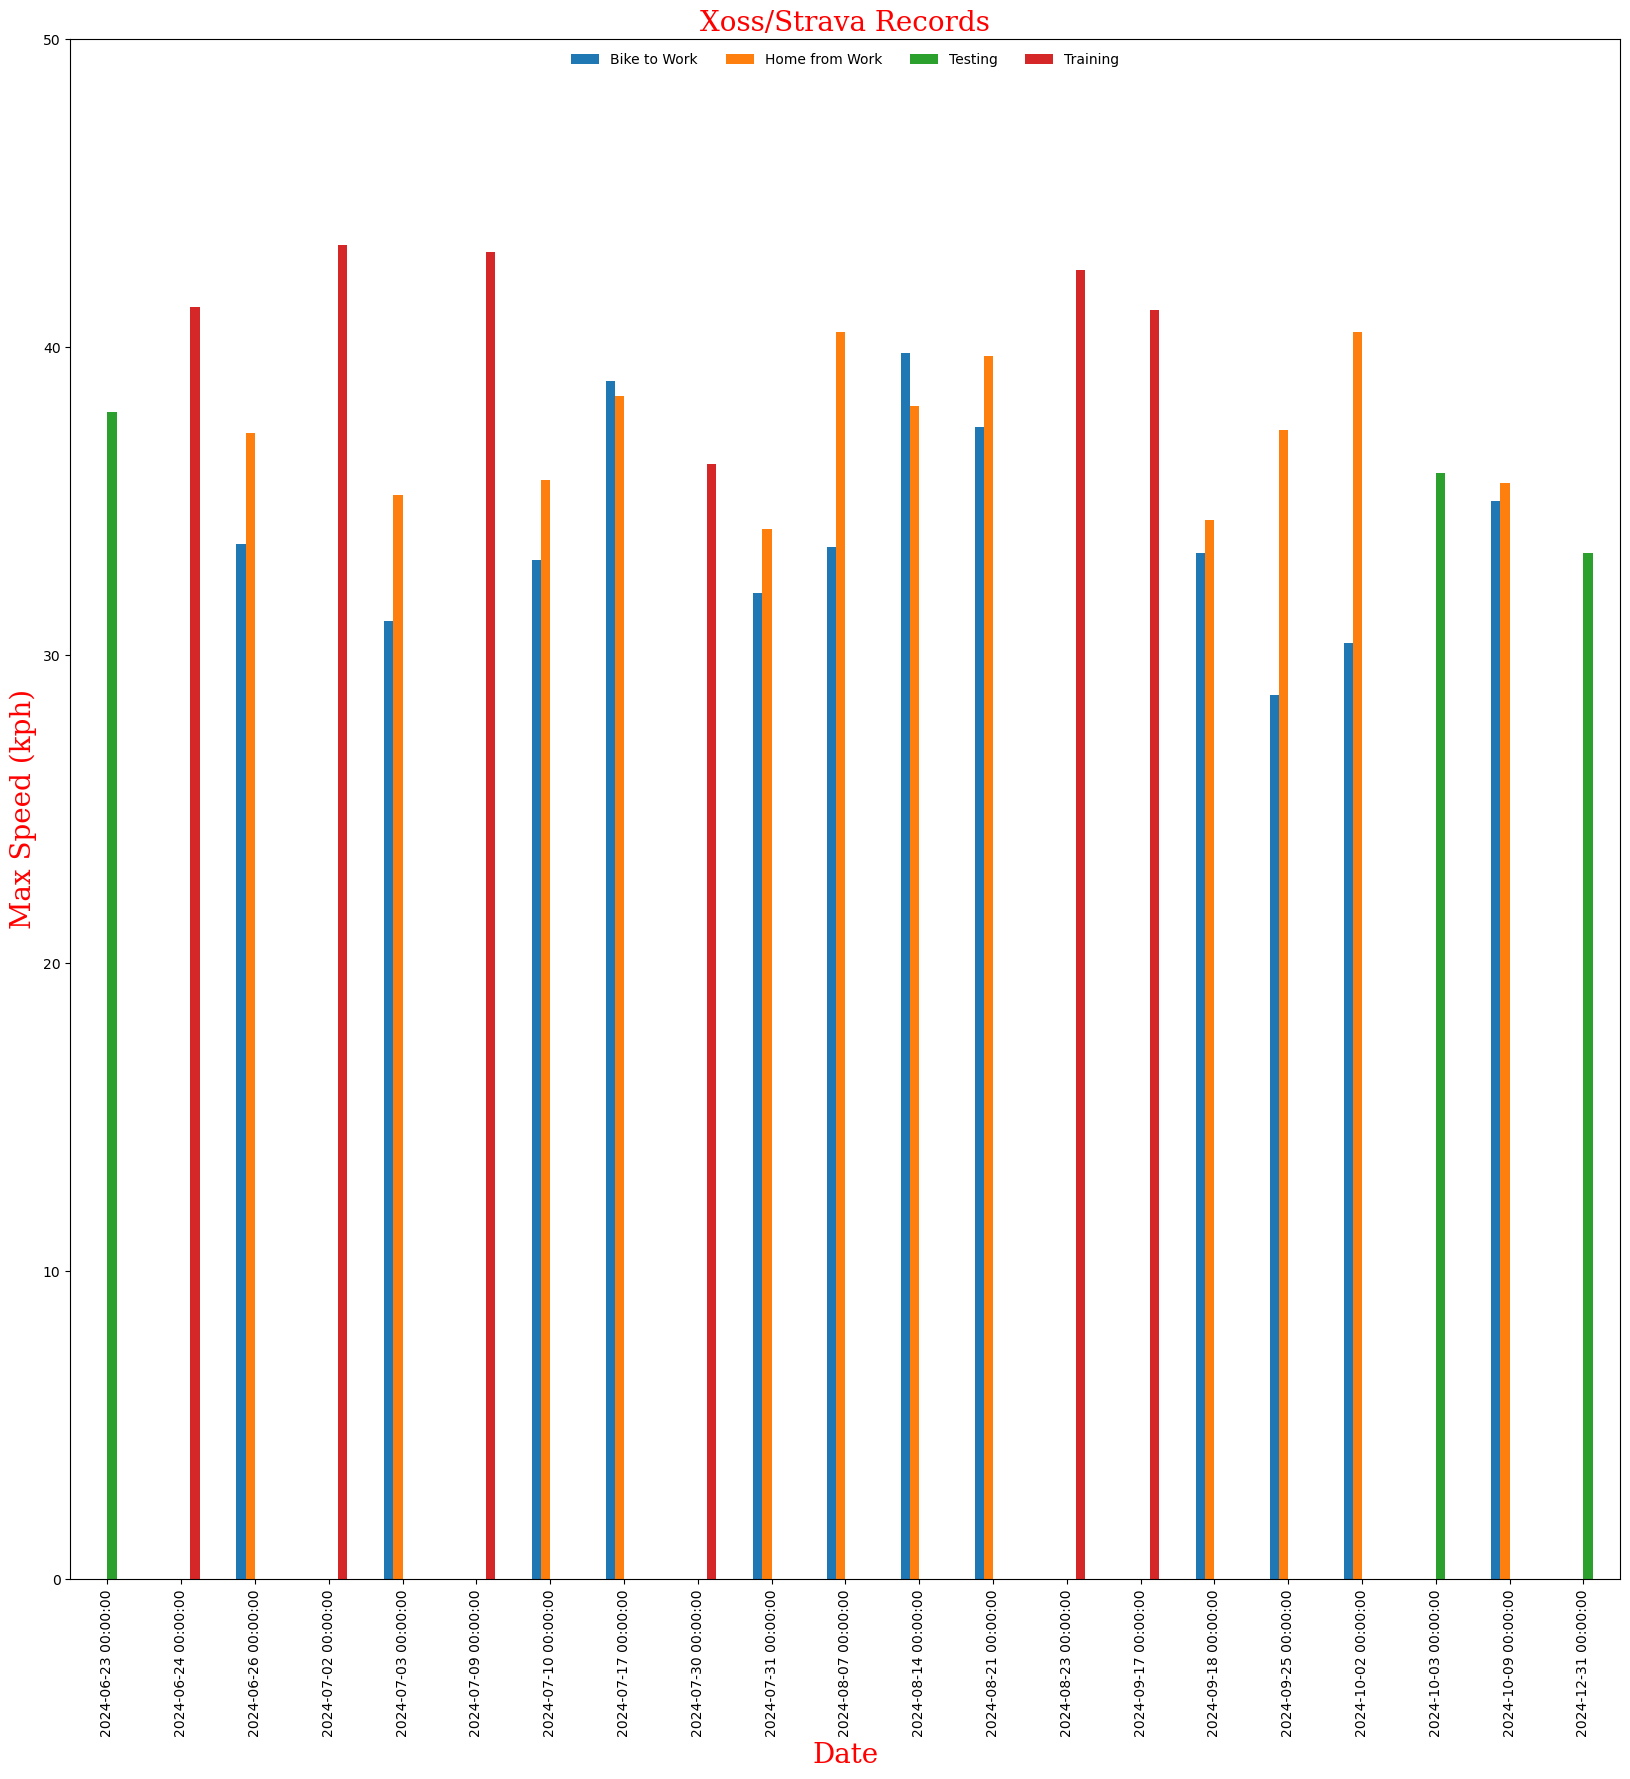

In [17]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
mst.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Testing", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=20)
plt.title('Xoss/Strava Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Max Speed (kph)', fontdict=f1)
plt.ylim(0, 50)
plt.savefig("fig/mst_xoss_strava.png")
plt.show()

In [18]:
te_b2w = xsst.loc[xsst["Purpose"] == "Bike to Work"].loc[:,"Temperature"]
te_b2wd = te_b2w.to_frame(name="Bike to Work")
te_hfw = xsst.loc[xsst["Purpose"] == "Home from Work"].loc[:,"Temperature"]
te_hfwd = te_hfw.to_frame(name="Home from Work")
te_tes = xsst.loc[xsst["Purpose"] == "Testing"].loc[:,"Temperature"]
te_tesd = te_tes.to_frame(name="Testing")
te_tra = xsst.loc[xsst["Purpose"] == "Training"].loc[:,"Temperature"]
te_trad = te_tra.to_frame(name="Training")
telist = [te_b2wd, te_hfwd, te_tesd, te_trad]
tet = pd.concat(telist, axis=1).fillna(0)
tet.columns = pd.MultiIndex.from_product([["Temperature"], ["Bike to Work", "Home from Work", "Testing", "Training"]])
tet.head() #Temperature total

Temperature                                
           Bike to Work Home from Work Testing Training
Date                                                   
2024-06-23          0.0            0.0    33.0      0.0
2024-06-24          0.0            0.0     0.0     34.0
2024-06-26         34.0           28.0     0.0      0.0
2024-07-02          0.0            0.0     0.0     36.0
2024-07-03         41.0           33.0     0.0      0.0

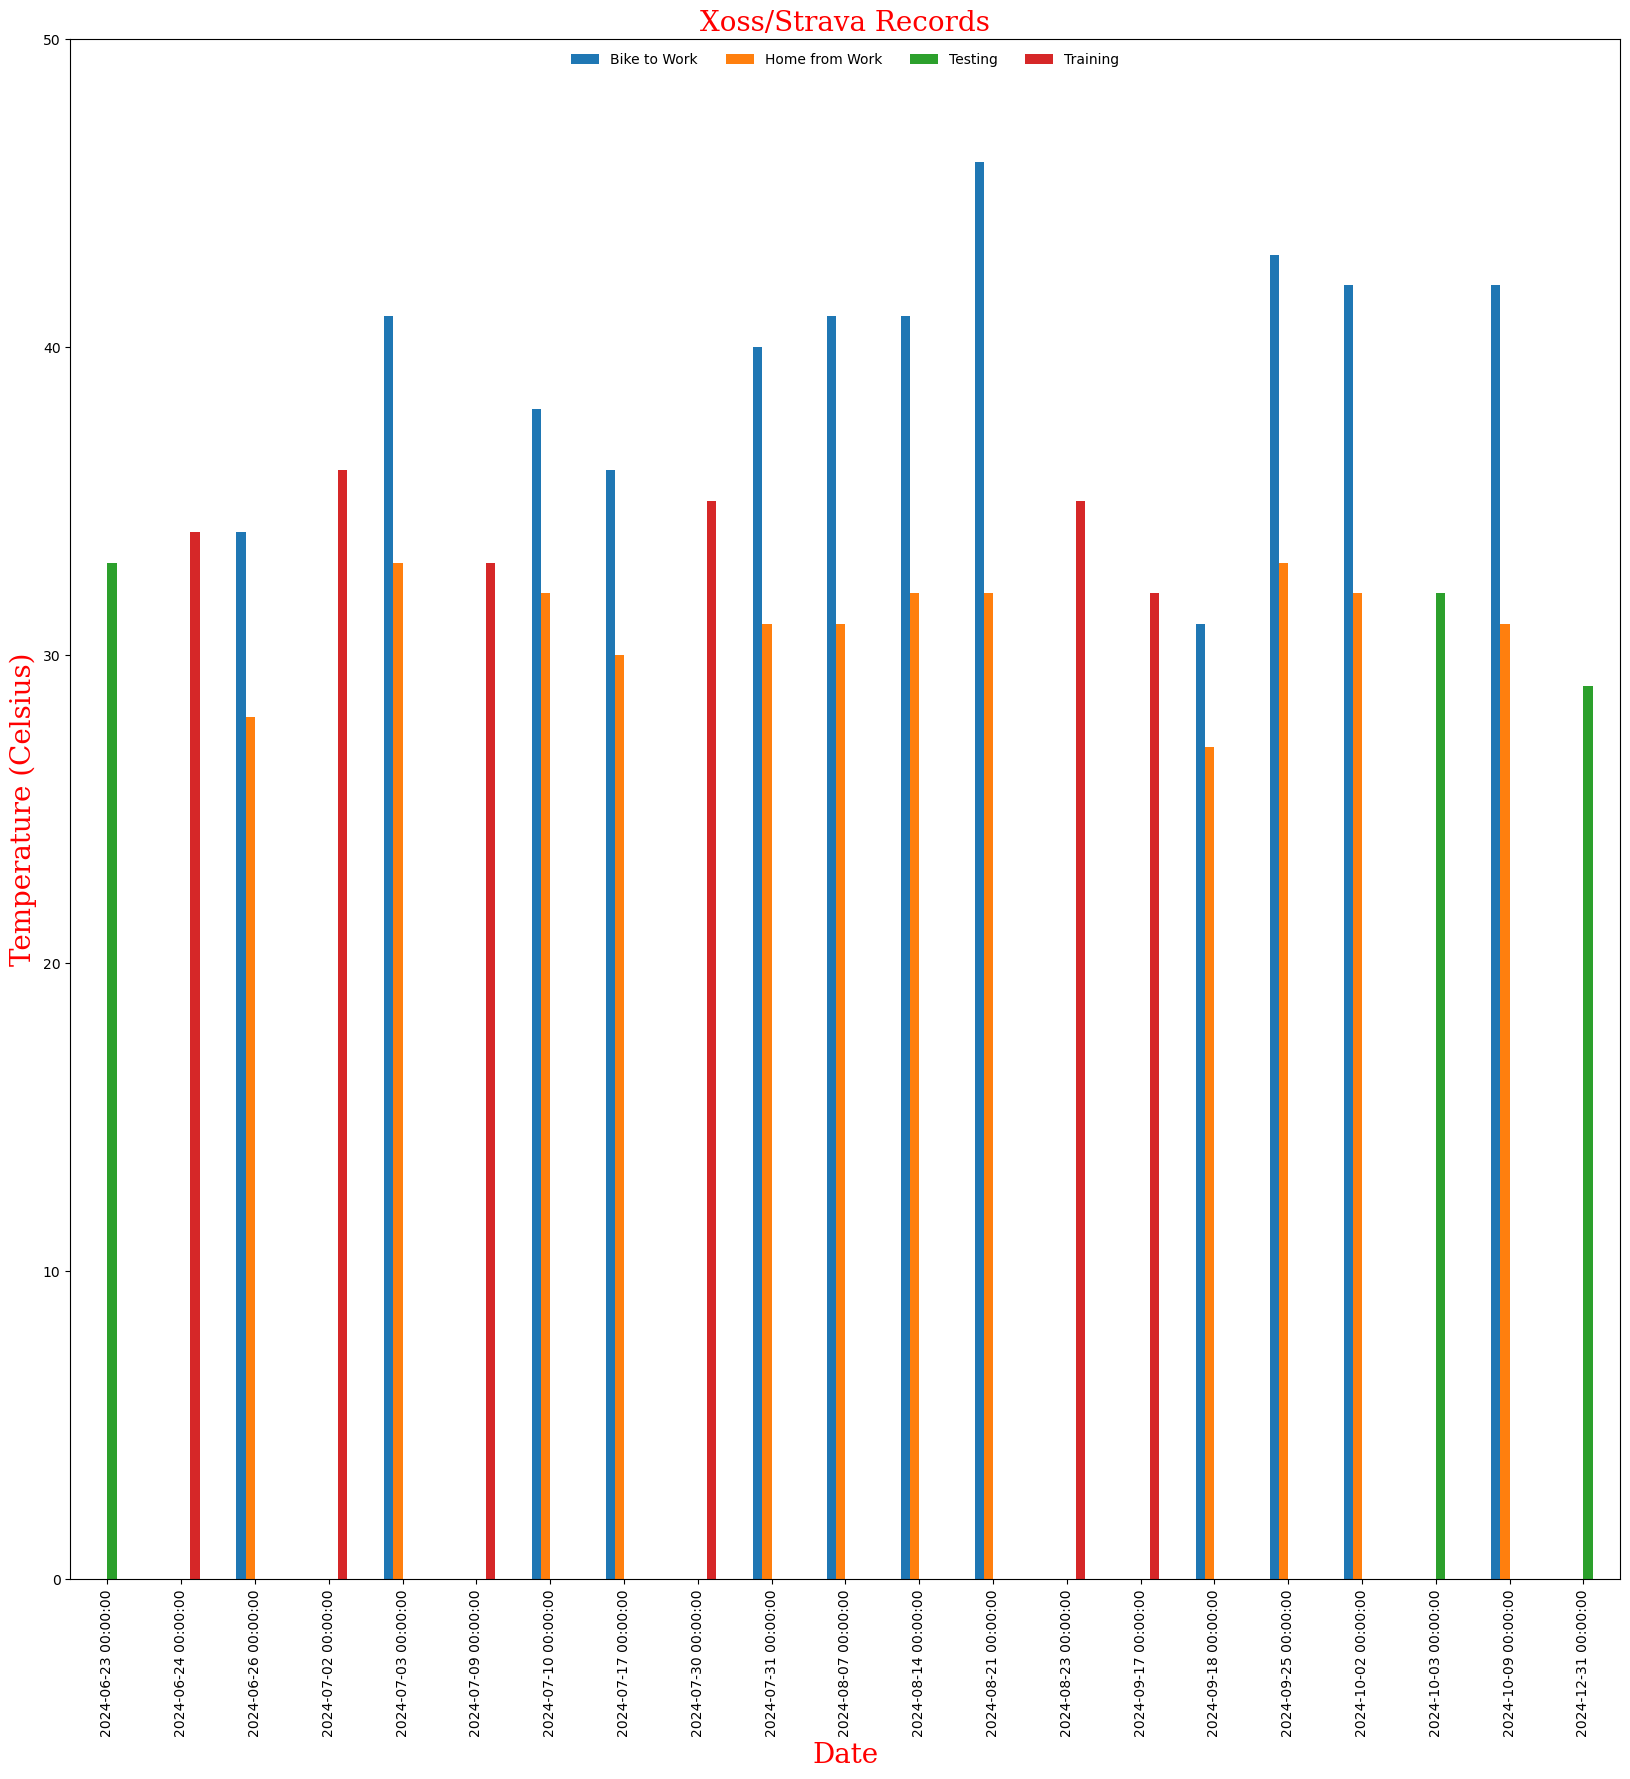

In [19]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
tet.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Testing", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=20)
plt.title('Xoss/Strava Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Temperature (Celsius)', fontdict=f1)
plt.ylim(0, 50)
plt.savefig("fig/tet_xoss_strava.png")
plt.show()

In [20]:
ti_b2w = xsst.loc[xsst["Purpose"] == "Bike to Work"].loc[:,"Time"]
ti_b2wd = ti_b2w.to_frame(name="Bike to Work")
ti_hfw = xsst.loc[xsst["Purpose"] == "Home from Work"].loc[:,"Time"]
ti_hfwd = ti_hfw.to_frame(name="Home from Work")
ti_tes = xsst.loc[xsst["Purpose"] == "Testing"].loc[:,"Time"]
ti_tesd = ti_tes.to_frame(name="Testing")
ti_tra = xsst.loc[xsst["Purpose"] == "Training"].loc[:,"Time"]
ti_trad = ti_tra.to_frame(name="Training")
tilist = [ti_b2wd, ti_hfwd, ti_tesd, ti_trad]
tit = pd.concat(tilist, axis=1).fillna(0)
tit.columns = pd.MultiIndex.from_product([["Time"], ["Bike to Work", "Home from Work", "tisting", "Training"]])
tit.head() #time total

Time                                
           Bike to Work Home from Work tisting Training
Date                                                   
2024-06-23          0.0            0.0  1101.0      0.0
2024-06-24          0.0            0.0     0.0  12972.0
2024-06-26       1568.0          969.0     0.0      0.0
2024-07-02          0.0            0.0     0.0  13979.0
2024-07-03       1504.0         1585.0     0.0      0.0

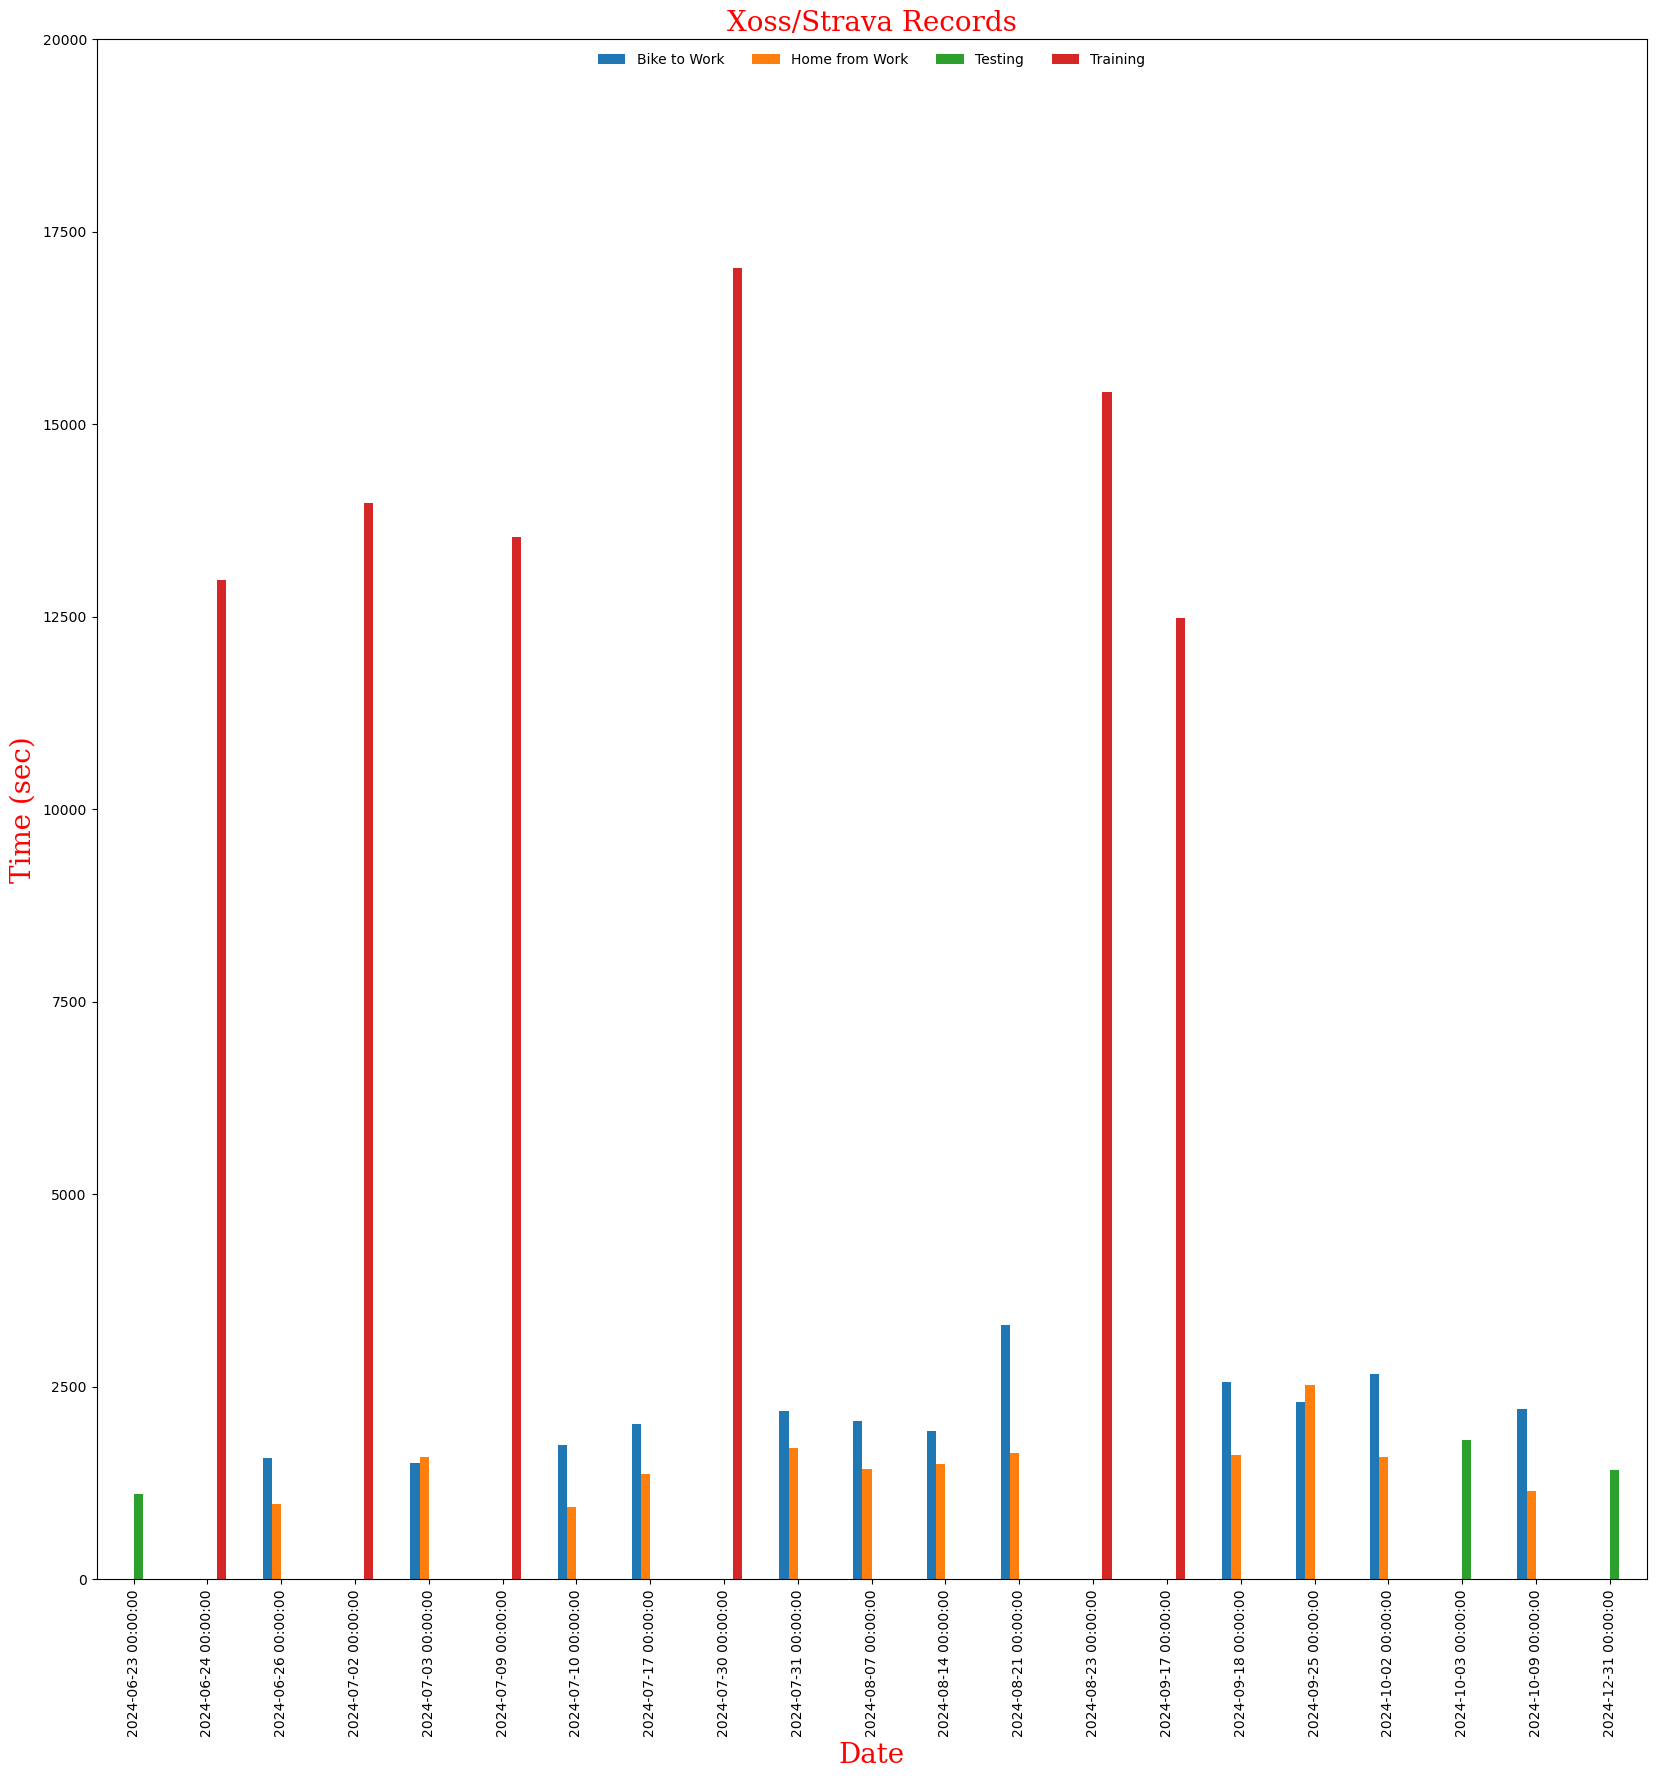

In [21]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
tit.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Testing", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=20)
plt.title('Xoss/Strava Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Time (sec)', fontdict=f1)
plt.ylim(0, 20000)
plt.savefig("fig/tit_xoss_strava.png")
plt.show()

In [22]:
catt = pd.concat([ast, cbt, dt, et, mst, tet, tit], axis=1)
catt.head() #category total merged

Average Speed                                 Calories Burned  \
            Bike to Work Home from Work Testing Training    Bike to Work   
Date                                                                       
2024-06-23           0.0            0.0    22.0      0.0             0.0   
2024-06-24           0.0            0.0     0.0     18.2             0.0   
2024-06-26          18.0           14.9     0.0      0.0           214.0   
2024-07-02           0.0            0.0     0.0     18.4             0.0   
2024-07-03          15.6           14.7     0.0      0.0           174.0   

                                               Distance                 ...  \
           Home from Work Testing Training Bike to Work Home from Work  ...   
Date                                                                    ...   
2024-06-23            0.0   201.0      0.0         0.00           0.00  ...   
2024-06-24            0.0     0.0   1853.0         0.00           0.00  ...   
2024-06-26          107.0     0.0      0.0         7.85           4.01  ...   
2024-07-02            0.0     0.0   2015.0         0.00           0.00  ...   
2024-07-03          173.0     0.0      0.0         6.50           6.46  ...   

           Max Speed           Temperature                                  \
             Testing Training Bike to Work Home from Work Testing Training   
Date                                                                         
2024-06-23      37.9      0.0          0.0            0.0    33.0      0.0   
2024-06-24       0.0     41.3          0.0            0.0     0.0     34.0   
2024-06-26       0.0      0.0         34.0           28.0     0.0      0.0   
2024-07-02       0.0     43.3          0.0            0.0     0.0     36.0   
2024-07-03       0.0      0.0         41.0           33.0     0.0      0.0   

                   Time                                  
           Bike to Work Home from Work tisting Training  
Date                                                     
2024-06-23          0.0            0.0  1101.0      0.0  
2024-06-24          0.0            0.0     0.0  12972.0  
2024-06-26       1568.0          969.0     0.0      0.0  
2024-07-02          0.0            0.0     0.0  13979.0  
2024-07-03       1504.0         1585.0     0.0      0.0  

[5 rows x 28 columns]

In [51]:
#Rankings Average Speed
asb2w_r = as_b2wd
asb2wr = asb2w_r["Bike to Work"].rank(ascending=False)
asb2w_r['B2WR'] = asb2wr
asb2w_r = asb2w_r.sort_values('B2WR').head(3)

ashfw_r = as_hfwd
ashfwr = ashfw_r["Home from Work"].rank(ascending=False)
ashfw_r['HFWR'] = ashfwr
ashfw_r = ashfw_r.sort_values('HFWR').head(3)

astes_r = as_tesd
astesr = astes_r["Testing"].rank(ascending=False)
astes_r['TESR'] = astesr
astes_r = astes_r.sort_values('TESR').head(3)

astra_r = as_trad
astrar = astra_r["Training"].rank(ascending=False)
astra_r['TRAR'] = astrar
astra_r = astra_r.sort_values('TRAR').head(3)

aslistr = [asb2w_r, ashfw_r, astes_r, astra_r]
astr = pd.concat(aslistr, axis=1).fillna('0').sort_values(['B2WR', 'HFWR', 'TESR', 'TRAR'], ascending=[True,True,True,True])
astr.columns = pd.MultiIndex.from_product([["Average Speed"], ["Bike to Work", "B2WR", "Home from Work", "HFWR", "Testing", "TESR", "Training", "TRAR"]])
astr = astr.iloc[:, [0,2,4,6]].astype(float)
astr #average speed total rank

Average Speed                                
            Bike to Work Home from Work Testing Training
Date                                                    
2024-06-26          18.0            0.0     0.0      0.0
2024-08-21          17.7            0.0     0.0      0.0
2024-07-17          17.5           16.8     0.0      0.0
2024-07-10           0.0           15.7     0.0      0.0
2024-08-07           0.0           15.7     0.0      0.0
2024-06-23           0.0            0.0    22.0      0.0
2024-12-31           0.0            0.0    19.9      0.0
2024-10-03           0.0            0.0    15.2      0.0
2024-08-23           0.0            0.0     0.0     19.8
2024-07-09           0.0            0.0     0.0     19.4
2024-07-02           0.0            0.0     0.0     18.4

In [52]:
#Rankings Calories Burned
cbb2w_r = cb_b2wd
cbb2wr = cbb2w_r["Bike to Work"].rank(ascending=False)
cbb2w_r['B2WR'] = cbb2wr
cbb2w_r = cbb2w_r.sort_values('B2WR').head(3)

cbhfw_r = cb_hfwd
cbhfwr = cbhfw_r["Home from Work"].rank(ascending=False)
cbhfw_r['HFWR'] = cbhfwr
cbhfw_r = cbhfw_r.sort_values('HFWR').head(3)

cbtes_r = cb_tesd
cbtesr = cbtes_r["Testing"].rank(ascending=False)
cbtes_r['TESR'] = cbtesr
cbtes_r = cbtes_r.sort_values('TESR').head(3)

cbtra_r = cb_trad
cbtrar = cbtra_r["Training"].rank(ascending=False)
cbtra_r['TRAR'] = cbtrar
cbtra_r = cbtra_r.sort_values('TRAR').head(3)

cblistr = [cbb2w_r, cbhfw_r, cbtes_r, cbtra_r]
cbtr = pd.concat(cblistr, axis=1).fillna('0').sort_values(['B2WR', 'HFWR', 'TESR', 'TRAR'], ascending=[True,True,True,True])
cbtr.columns = pd.MultiIndex.from_product([["Calories Burned"], ["Bike to Work", "B2WR", "Home from Work", "HFWR", "Testing", "TESR", "Training", "TRAR"]])
cbtr = cbtr.iloc[:, [0,2,4,6]].astype(float)
cbtr #calories burned total rank

Calories Burned                                
              Bike to Work Home from Work Testing Training
Date                                                      
2024-08-21           449.0            0.0     0.0      0.0
2024-10-02           332.0          183.0     0.0      0.0
2024-09-18           296.0            0.0     0.0      0.0
2024-09-25             0.0          273.0     0.0      0.0
2024-07-17             0.0          181.0     0.0      0.0
2024-12-31             0.0            0.0   225.0      0.0
2024-10-03             0.0            0.0   215.0      0.0
2024-06-23             0.0            0.0   201.0      0.0
2024-08-23             0.0            0.0     0.0   2397.0
2024-07-30             0.0            0.0     0.0   2261.0
2024-07-09             0.0            0.0     0.0   2082.0

In [53]:
#Rankings Distance
db2w_r = d_b2wd
db2wr = db2w_r["Bike to Work"].rank(ascending=False)
db2w_r['B2WR'] = db2wr
db2w_r = db2w_r.sort_values('B2WR').head(3)

dhfw_r = d_hfwd
dhfwr = dhfw_r["Home from Work"].rank(ascending=False)
dhfw_r['HFWR'] = dhfwr
dhfw_r = dhfw_r.sort_values('HFWR').head(3)

dtes_r = d_tesd
dtesr = dtes_r["Testing"].rank(ascending=False)
dtes_r['TESR'] = dtesr
dtes_r = dtes_r.sort_values('TESR').head(3)

dtra_r = d_trad
dtrar = dtra_r["Training"].rank(ascending=False)
dtra_r['TRAR'] = dtrar
dtra_r = dtra_r.sort_values('TRAR').head(3)

dlistr = [db2w_r, dhfw_r, dtes_r, dtra_r]
dtr = pd.concat(dlistr, axis=1).fillna('0').sort_values(['B2WR', 'HFWR', 'TESR', 'TRAR'], ascending=[True,True,True,True])
dtr.columns = pd.MultiIndex.from_product([["Distance"], ["Bike to Work", "B2WR", "Home from Work", "HFWR", "Testing", "TESR", "Training", "TRAR"]])
dtr = dtr.iloc[:, [0,2,4,6]].astype(float)
dtr #distance total rank

Distance                                
           Bike to Work Home from Work Testing Training
Date                                                   
2024-08-21        16.24           6.55    0.00     0.00
2024-10-02        12.07           0.00    0.00     0.00
2024-09-18        11.03           6.50    0.00     0.00
2024-09-25         0.00          10.11    0.00     0.00
2024-12-31         0.00           0.00    7.80     0.00
2024-10-03         0.00           0.00    7.64     0.00
2024-06-23         0.00           0.00    6.72     0.00
2024-08-23         0.00           0.00    0.00    84.80
2024-07-30         0.00           0.00    0.00    80.80
2024-07-09         0.00           0.00    0.00    73.11

In [54]:
#Rankings Elevation
eb2w_r = e_b2wd
eb2wr = eb2w_r["Bike to Work"].rank(ascending=False)
eb2w_r['B2WR'] = eb2wr
eb2w_r = eb2w_r.sort_values('B2WR').head(3)

ehfw_r = e_hfwd
ehfwr = ehfw_r["Home from Work"].rank(ascending=False)
ehfw_r['HFWR'] = ehfwr
ehfw_r = ehfw_r.sort_values('HFWR').head(3)

etes_r = e_tesd
etesr = etes_r["Testing"].rank(ascending=False)
etes_r['TESR'] = etesr
etes_r = etes_r.sort_values('TESR').head(3)

etra_r = e_trad
etrar = etra_r["Training"].rank(ascending=False)
etra_r['TRAR'] = etrar
etra_r = etra_r.sort_values('TRAR').head(3)

elistr = [eb2w_r, ehfw_r, etes_r, etra_r]
etr = pd.concat(elistr, axis=1).fillna('0').sort_values(['B2WR', 'HFWR', 'TESR', 'TRAR'], ascending=[True,True,True,True])
etr.columns = pd.MultiIndex.from_product([["Elevation"], ["Bike to Work", "B2WR", "Home from Work", "HFWR", "Testing", "TESR", "Training", "TRAR"]])
etr = etr.iloc[:, [0,2,4,6]].astype(float)
etr #elevation total rank

Elevation                                
           Bike to Work Home from Work Testing Training
Date                                                   
2024-08-21        125.0            0.0     0.0      0.0
2024-09-25        103.0            0.0     0.0      0.0
2024-07-17        100.0           39.0     0.0      0.0
2024-08-07          0.0           40.0     0.0      0.0
2024-08-14          0.0           40.0     0.0      0.0
2024-06-23          0.0            0.0    30.0      0.0
2024-10-03          0.0            0.0    19.0      0.0
2024-12-31          0.0            0.0    17.0      0.0
2024-09-17          0.0            0.0     0.0    794.0
2024-07-02          0.0            0.0     0.0    633.0
2024-08-23          0.0            0.0     0.0    544.0

In [55]:
#Rankings Max Speed
msb2w_r = ms_b2wd
msb2wr = msb2w_r["Bike to Work"].rank(ascending=False)
msb2w_r['B2WR'] = msb2wr
msb2w_r = msb2w_r.sort_values('B2WR').head(3)

mshfw_r = ms_hfwd
mshfwr = mshfw_r["Home from Work"].rank(ascending=False)
mshfw_r['HFWR'] = mshfwr
mshfw_r = mshfw_r.sort_values('HFWR').head(3)

mstes_r = ms_tesd
mstesr = mstes_r["Testing"].rank(ascending=False)
mstes_r['TESR'] = mstesr
mstes_r = mstes_r.sort_values('TESR').head(3)

mstra_r = ms_trad
mstrar = mstra_r["Training"].rank(ascending=False)
mstra_r['TRAR'] = mstrar
mstra_r = mstra_r.sort_values('TRAR').head(3)

mslistr = [msb2w_r, mshfw_r, mstes_r, mstra_r]
mstr = pd.concat(mslistr, axis=1).fillna('0').sort_values(['B2WR', 'HFWR', 'TESR', 'TRAR'], ascending=[True,True,True,True])
mstr.columns = pd.MultiIndex.from_product([["Max Speed"], ["Bike to Work", "B2WR", "Home from Work", "HFWR", "Testing", "TESR", "Training", "TRAR"]])
mstr = mstr.iloc[:, [0,2,4,6]].astype(float)
mstr #max speed total rank

Max Speed                                
           Bike to Work Home from Work Testing Training
Date                                                   
2024-08-14         39.8            0.0     0.0      0.0
2024-07-17         38.9            0.0     0.0      0.0
2024-08-21         37.4           39.7     0.0      0.0
2024-08-07          0.0           40.5     0.0      0.0
2024-10-02          0.0           40.5     0.0      0.0
2024-06-23          0.0            0.0    37.9      0.0
2024-10-03          0.0            0.0    35.9      0.0
2024-12-31          0.0            0.0    33.3      0.0
2024-07-02          0.0            0.0     0.0     43.3
2024-07-09          0.0            0.0     0.0     43.1
2024-08-23          0.0            0.0     0.0     42.5

In [65]:
#Rankings Temperature
teb2w_r = te_b2wd
teb2wr = teb2w_r["Bike to Work"].rank(ascending=False)
teb2w_r['B2WR'] = teb2wr
teb2w_r = teb2w_r.sort_values('B2WR').head(3)

tehfw_r = te_hfwd
tehfwr = tehfw_r["Home from Work"].rank(ascending=False)
tehfw_r['HFWR'] = tehfwr
tehfw_r = tehfw_r.sort_values('HFWR').head(3)

tetes_r = te_tesd
tetesr = tetes_r["Testing"].rank(ascending=False)
tetes_r['TESR'] = tetesr
tetes_r = tetes_r.sort_values('TESR').head(3)

tetra_r = te_trad
tetrar = tetra_r["Training"].rank(ascending=False)
tetra_r['TRAR'] = tetrar
tetra_r = tetra_r.sort_values('TRAR').head(3)

telistr = [teb2w_r, tehfw_r, tetes_r, tetra_r]
tetr = pd.concat(telistr, axis=1).fillna('0').sort_values(['B2WR', 'HFWR', 'TESR', 'TRAR'], ascending=[True,True,True,True])
tetr.columns = pd.MultiIndex.from_product([["Temperature"], ["Bike to Work", "B2WR", "Home from Work", "HFWR", "Testing", "TESR", "Training", "TRAR"]])
tetr = tetr.iloc[:, [0,2,4,6]].astype(float)
tetr #temperature total rank

Temperature                                
           Bike to Work Home from Work Testing Training
Date                                                   
2024-08-21         46.0            0.0     0.0      0.0
2024-09-25         43.0           33.0     0.0      0.0
2024-10-02         42.0            0.0     0.0      0.0
2024-07-03          0.0           33.0     0.0      0.0
2024-07-10          0.0           32.0     0.0      0.0
2024-06-23          0.0            0.0    33.0      0.0
2024-10-03          0.0            0.0    32.0      0.0
2024-12-31          0.0            0.0    29.0      0.0
2024-07-02          0.0            0.0     0.0     36.0
2024-07-30          0.0            0.0     0.0     35.0
2024-08-23          0.0            0.0     0.0     35.0

In [56]:
#Rankings Time
tib2w_r = ti_b2wd
tib2wr = tib2w_r["Bike to Work"].rank(ascending=True)
tib2w_r['B2WR'] = tib2wr
tib2w_r = tib2w_r.sort_values('B2WR').head(3)

tihfw_r = ti_hfwd
tihfwr = tihfw_r["Home from Work"].rank(ascending=True)
tihfw_r['HFWR'] = tihfwr
tihfw_r = tihfw_r.sort_values('HFWR').head(3)

tites_r = ti_tesd
titesr = tites_r["Testing"].rank(ascending=True)
tites_r['TESR'] = titesr
tites_r = tites_r.sort_values('TESR').head(3)

titra_r = ti_trad
titrar = titra_r["Training"].rank(ascending=True)
titra_r['TRAR'] = titrar
titra_r = titra_r.sort_values('TRAR').head(3)

tilistr = [tib2w_r, tihfw_r, tites_r, titra_r]
titr = pd.concat(tilistr, axis=1).fillna('0').sort_values(['B2WR', 'HFWR', 'TESR', 'TRAR'], ascending=[False,False,False,False])
titr.columns = pd.MultiIndex.from_product([["Time"], ["Bike to Work", "B2WR", "Home from Work", "HFWR", "Testing", "TESR", "Training", "TRAR"]])
titr = titr.iloc[:, [0,2,4,6]].astype(float)
titr #time total rank

Time                                
           Bike to Work Home from Work Testing Training
Date                                                   
2024-07-09          0.0            0.0     0.0  13539.0
2024-06-24          0.0            0.0     0.0  12972.0
2024-09-17          0.0            0.0     0.0  12488.0
2024-10-03          0.0            0.0  1812.0      0.0
2024-12-31          0.0            0.0  1415.0      0.0
2024-06-23          0.0            0.0  1101.0      0.0
2024-10-09          0.0         1149.0     0.0      0.0
2024-07-10       1736.0          937.0     0.0      0.0
2024-06-26       1568.0          969.0     0.0      0.0
2024-07-03       1504.0            0.0     0.0      0.0

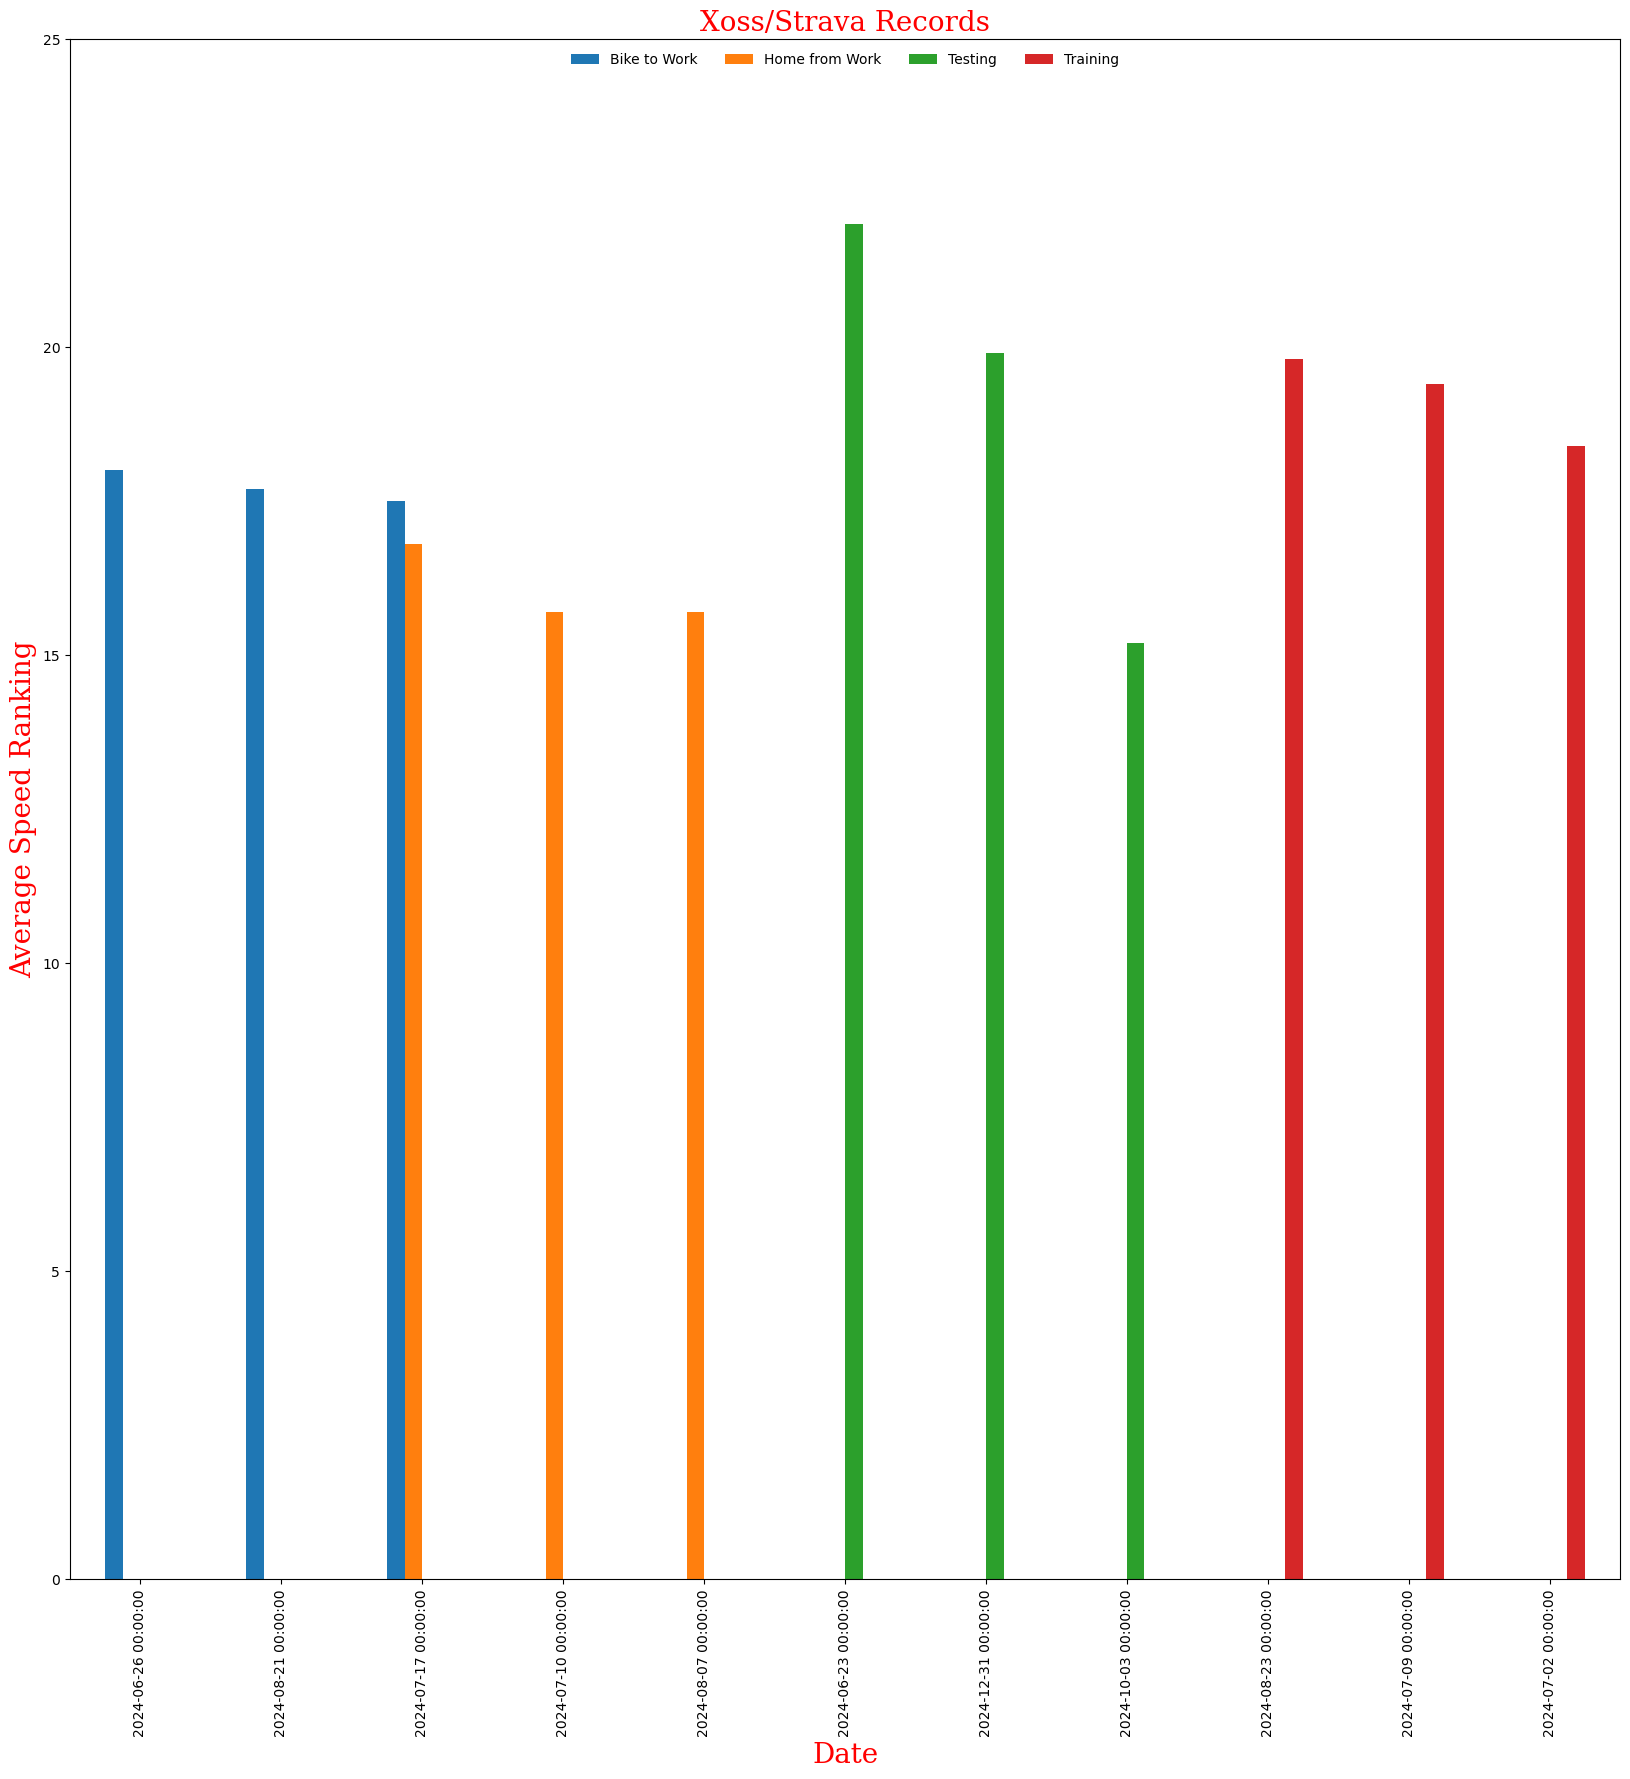

In [57]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
astr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Testing", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=20)
plt.title('Xoss/Strava Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Average Speed Ranking', fontdict=f1)
plt.ylim(0, 25)
plt.savefig("fig/astr_xoss_strava.png")
plt.show()

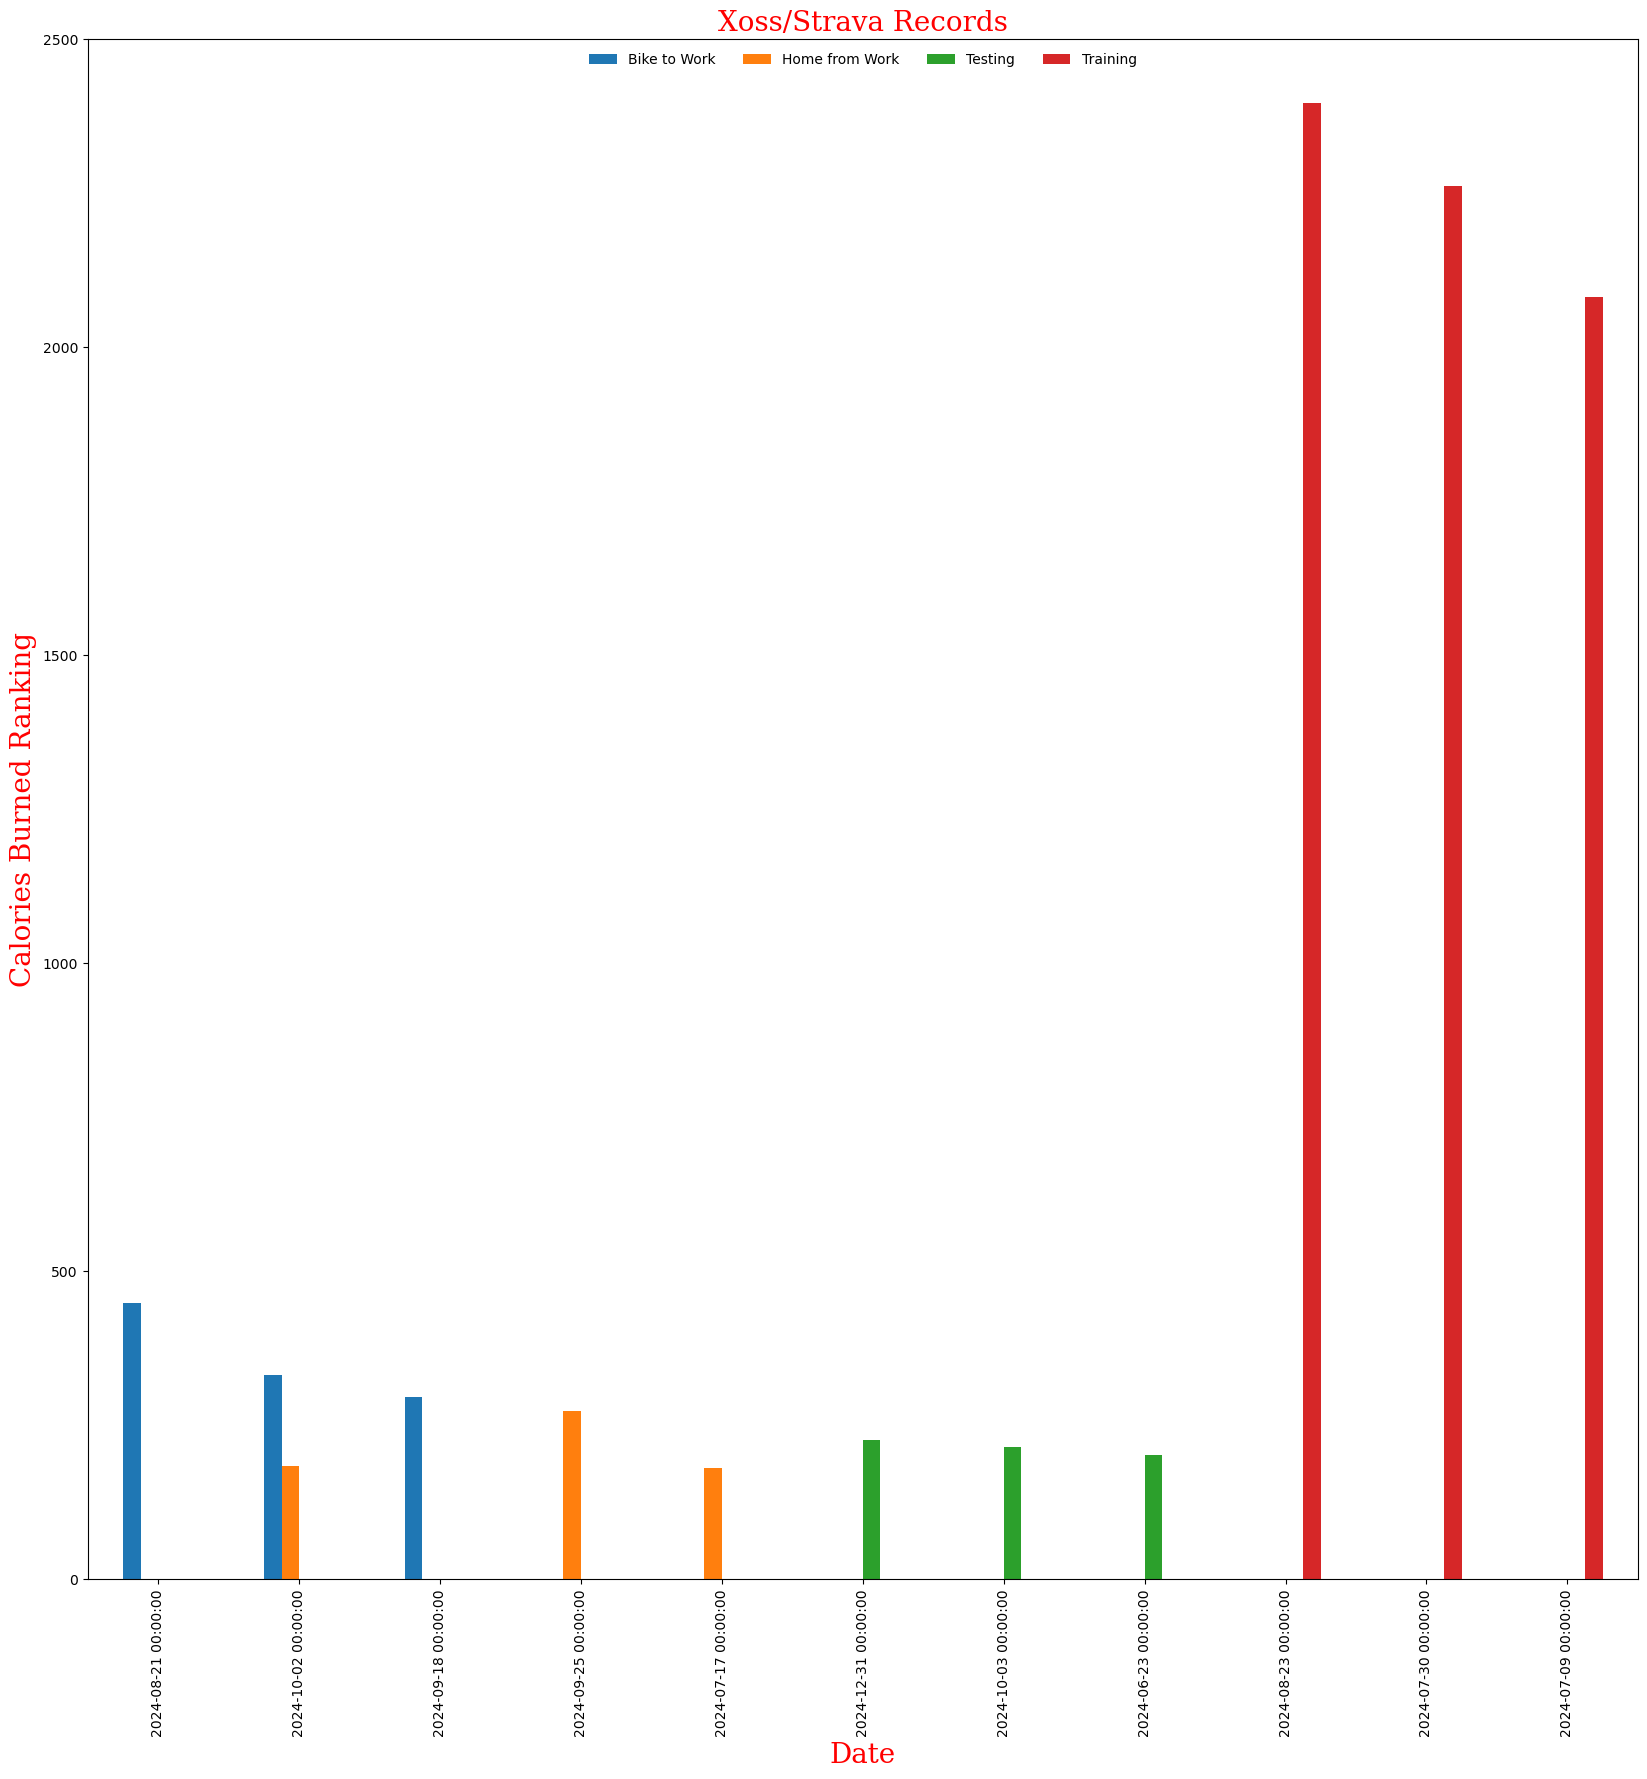

In [58]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
cbtr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Testing", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=20)
plt.title('Xoss/Strava Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Calories Burned Ranking', fontdict=f1)
plt.ylim(0, 2500)
plt.savefig("fig/cbtr_xoss_strava.png")
plt.show()

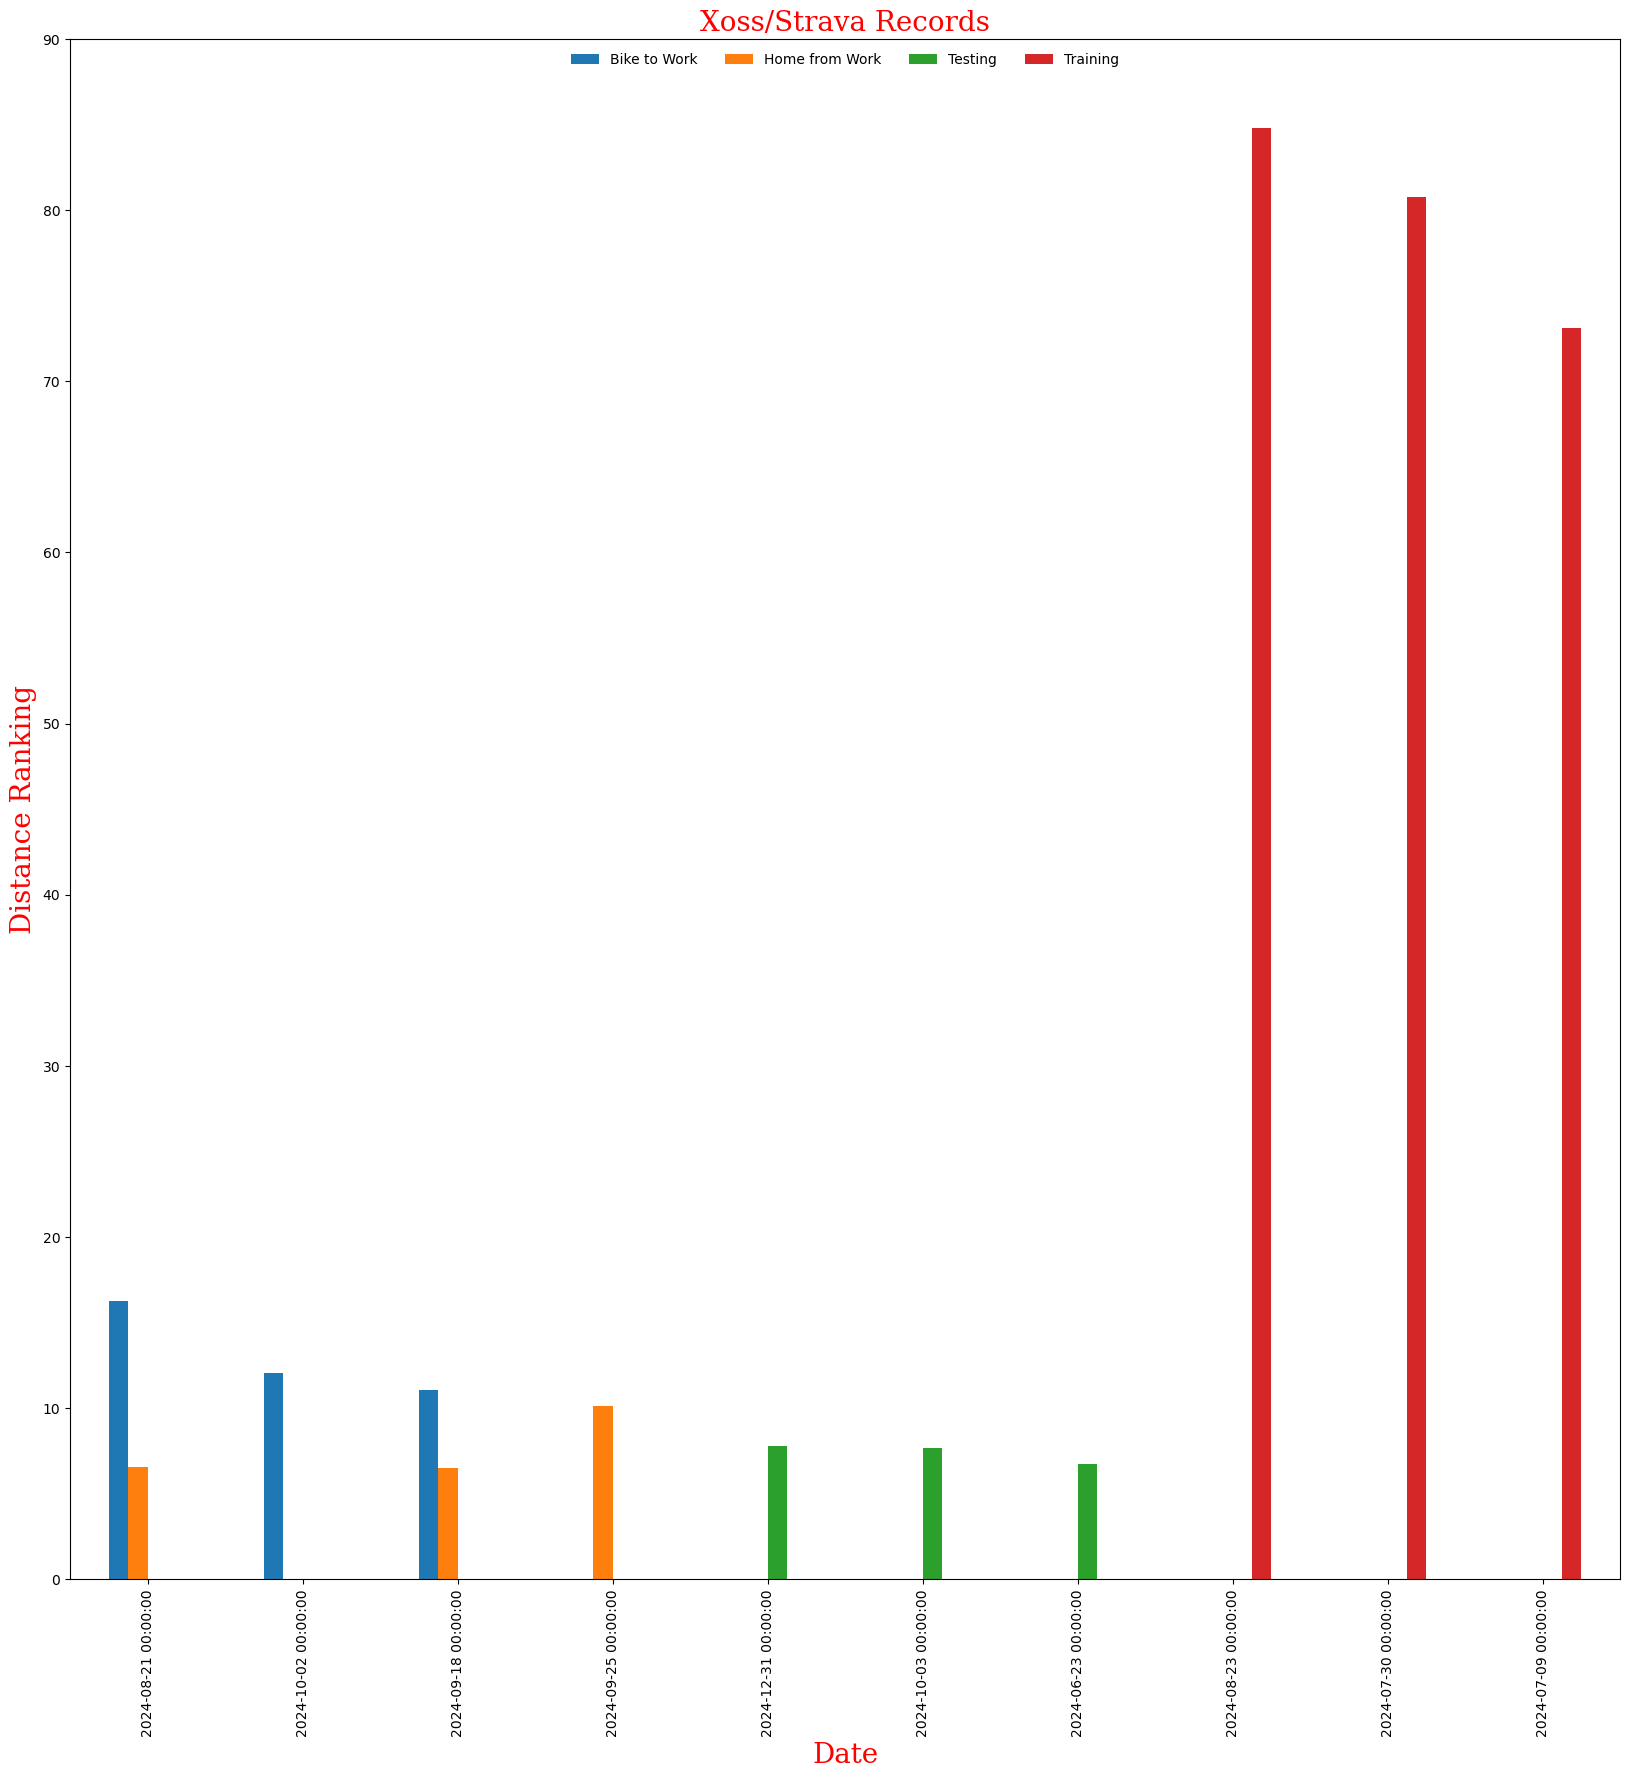

In [59]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
dtr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Testing", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=20)
plt.title('Xoss/Strava Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Distance Ranking', fontdict=f1)
plt.ylim(0, 90)
plt.savefig("fig/dtr_xoss_strava.png")
plt.show()

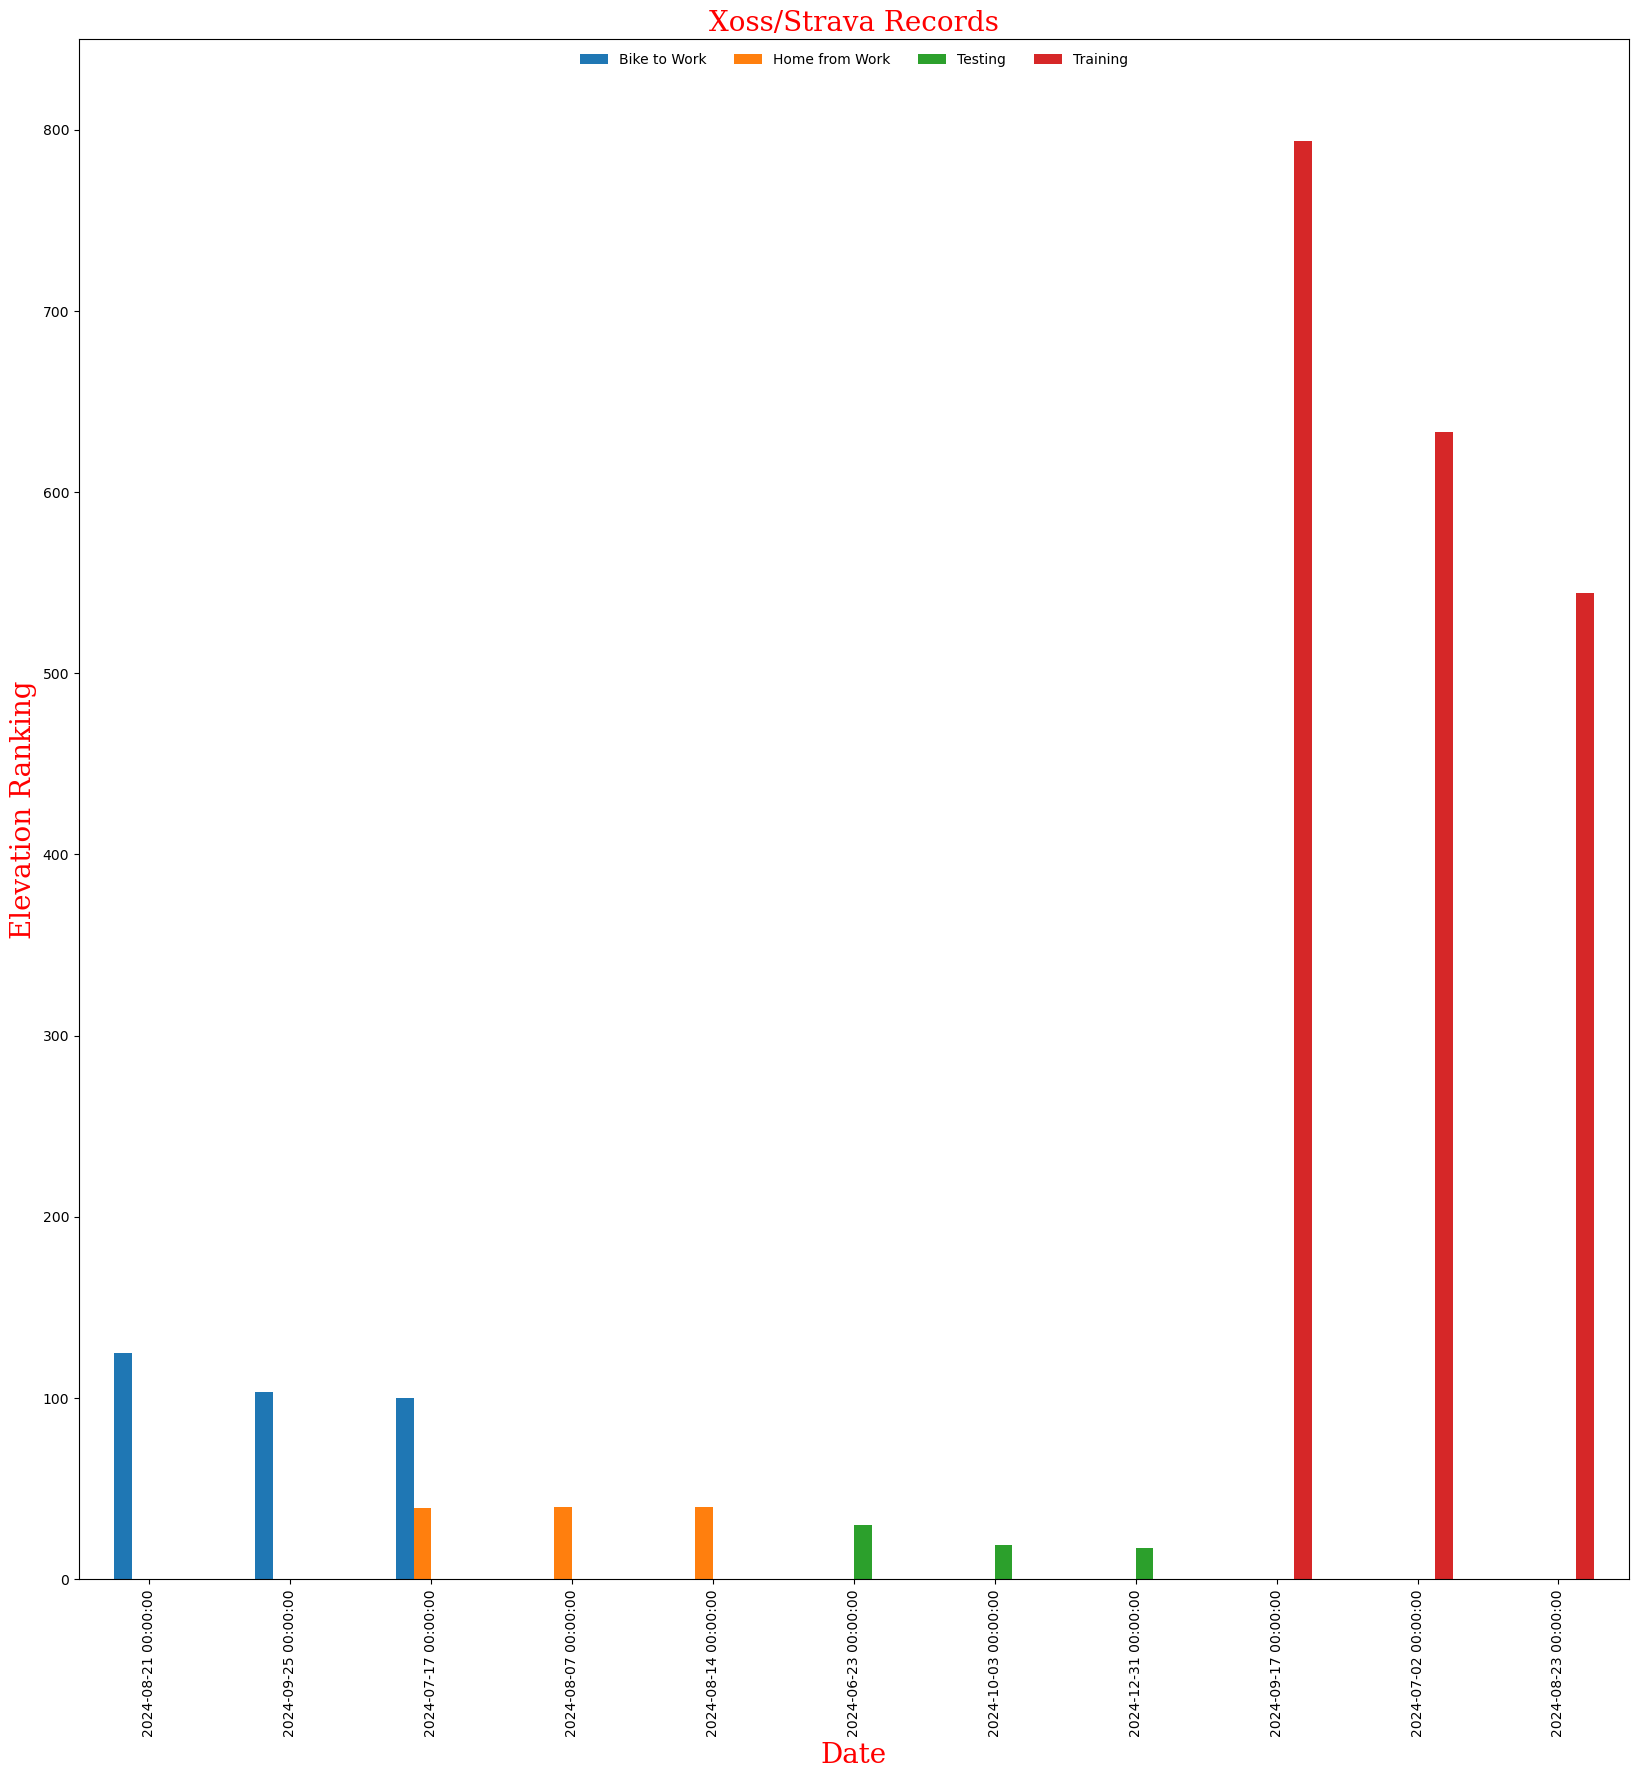

In [60]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
etr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Testing", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=20)
plt.title('Xoss/Strava Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Elevation Ranking', fontdict=f1)
plt.ylim(0, 850)
plt.savefig("fig/etr_xoss_strava.png")
plt.show()

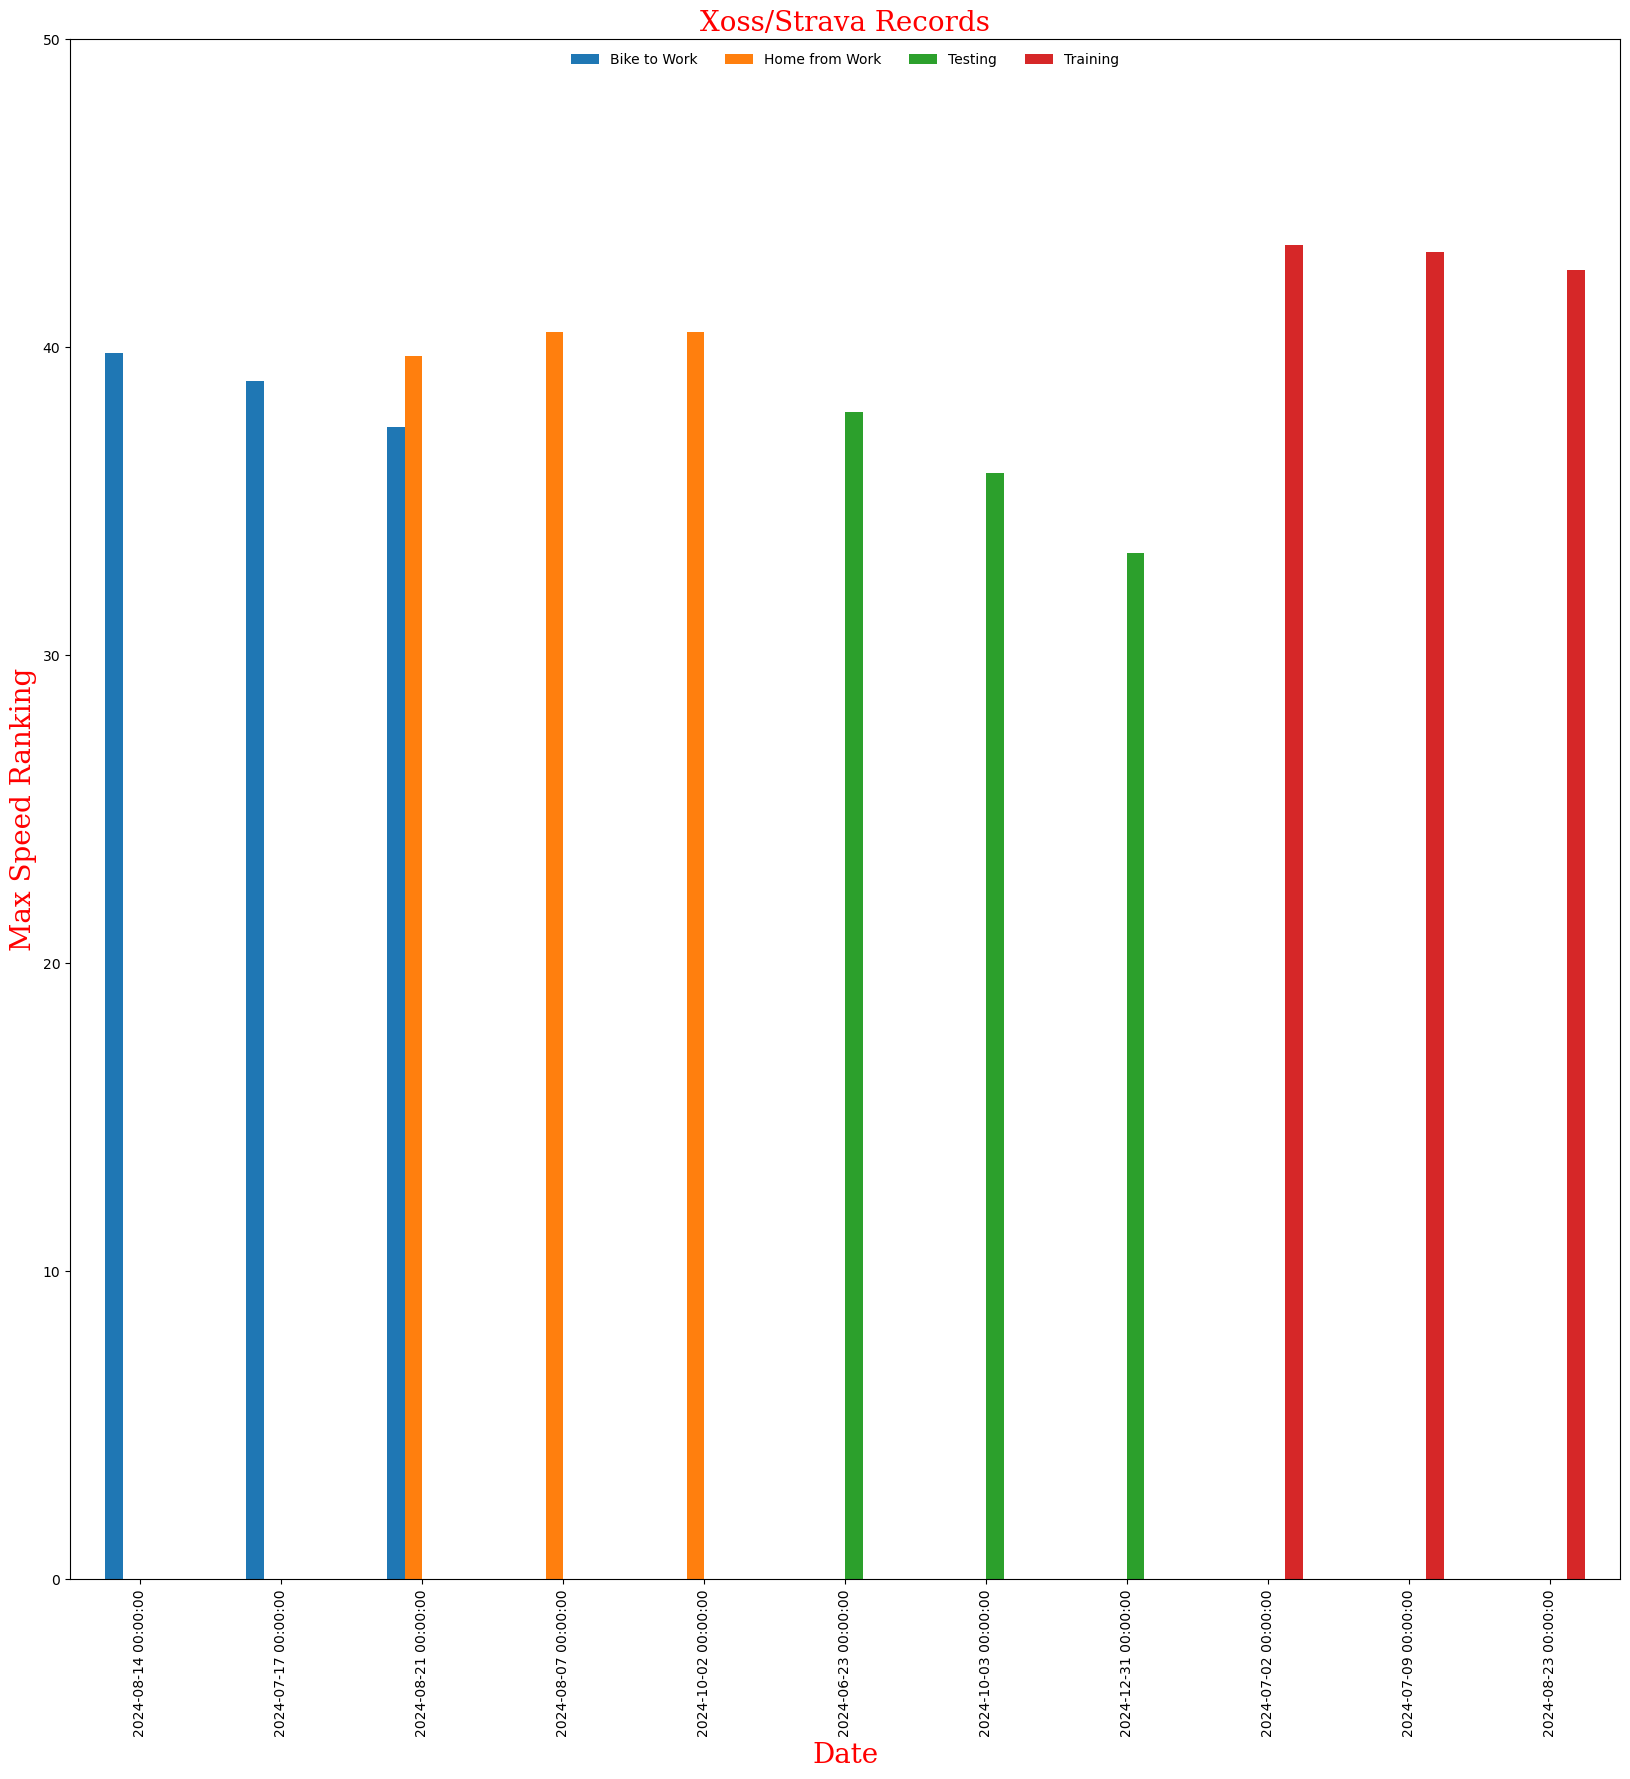

In [61]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
mstr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Testing", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=20)
plt.title('Xoss/Strava Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Max Speed Ranking', fontdict=f1)
plt.ylim(0, 50)
plt.savefig("fig/mstr_xoss_strava.png")
plt.show()

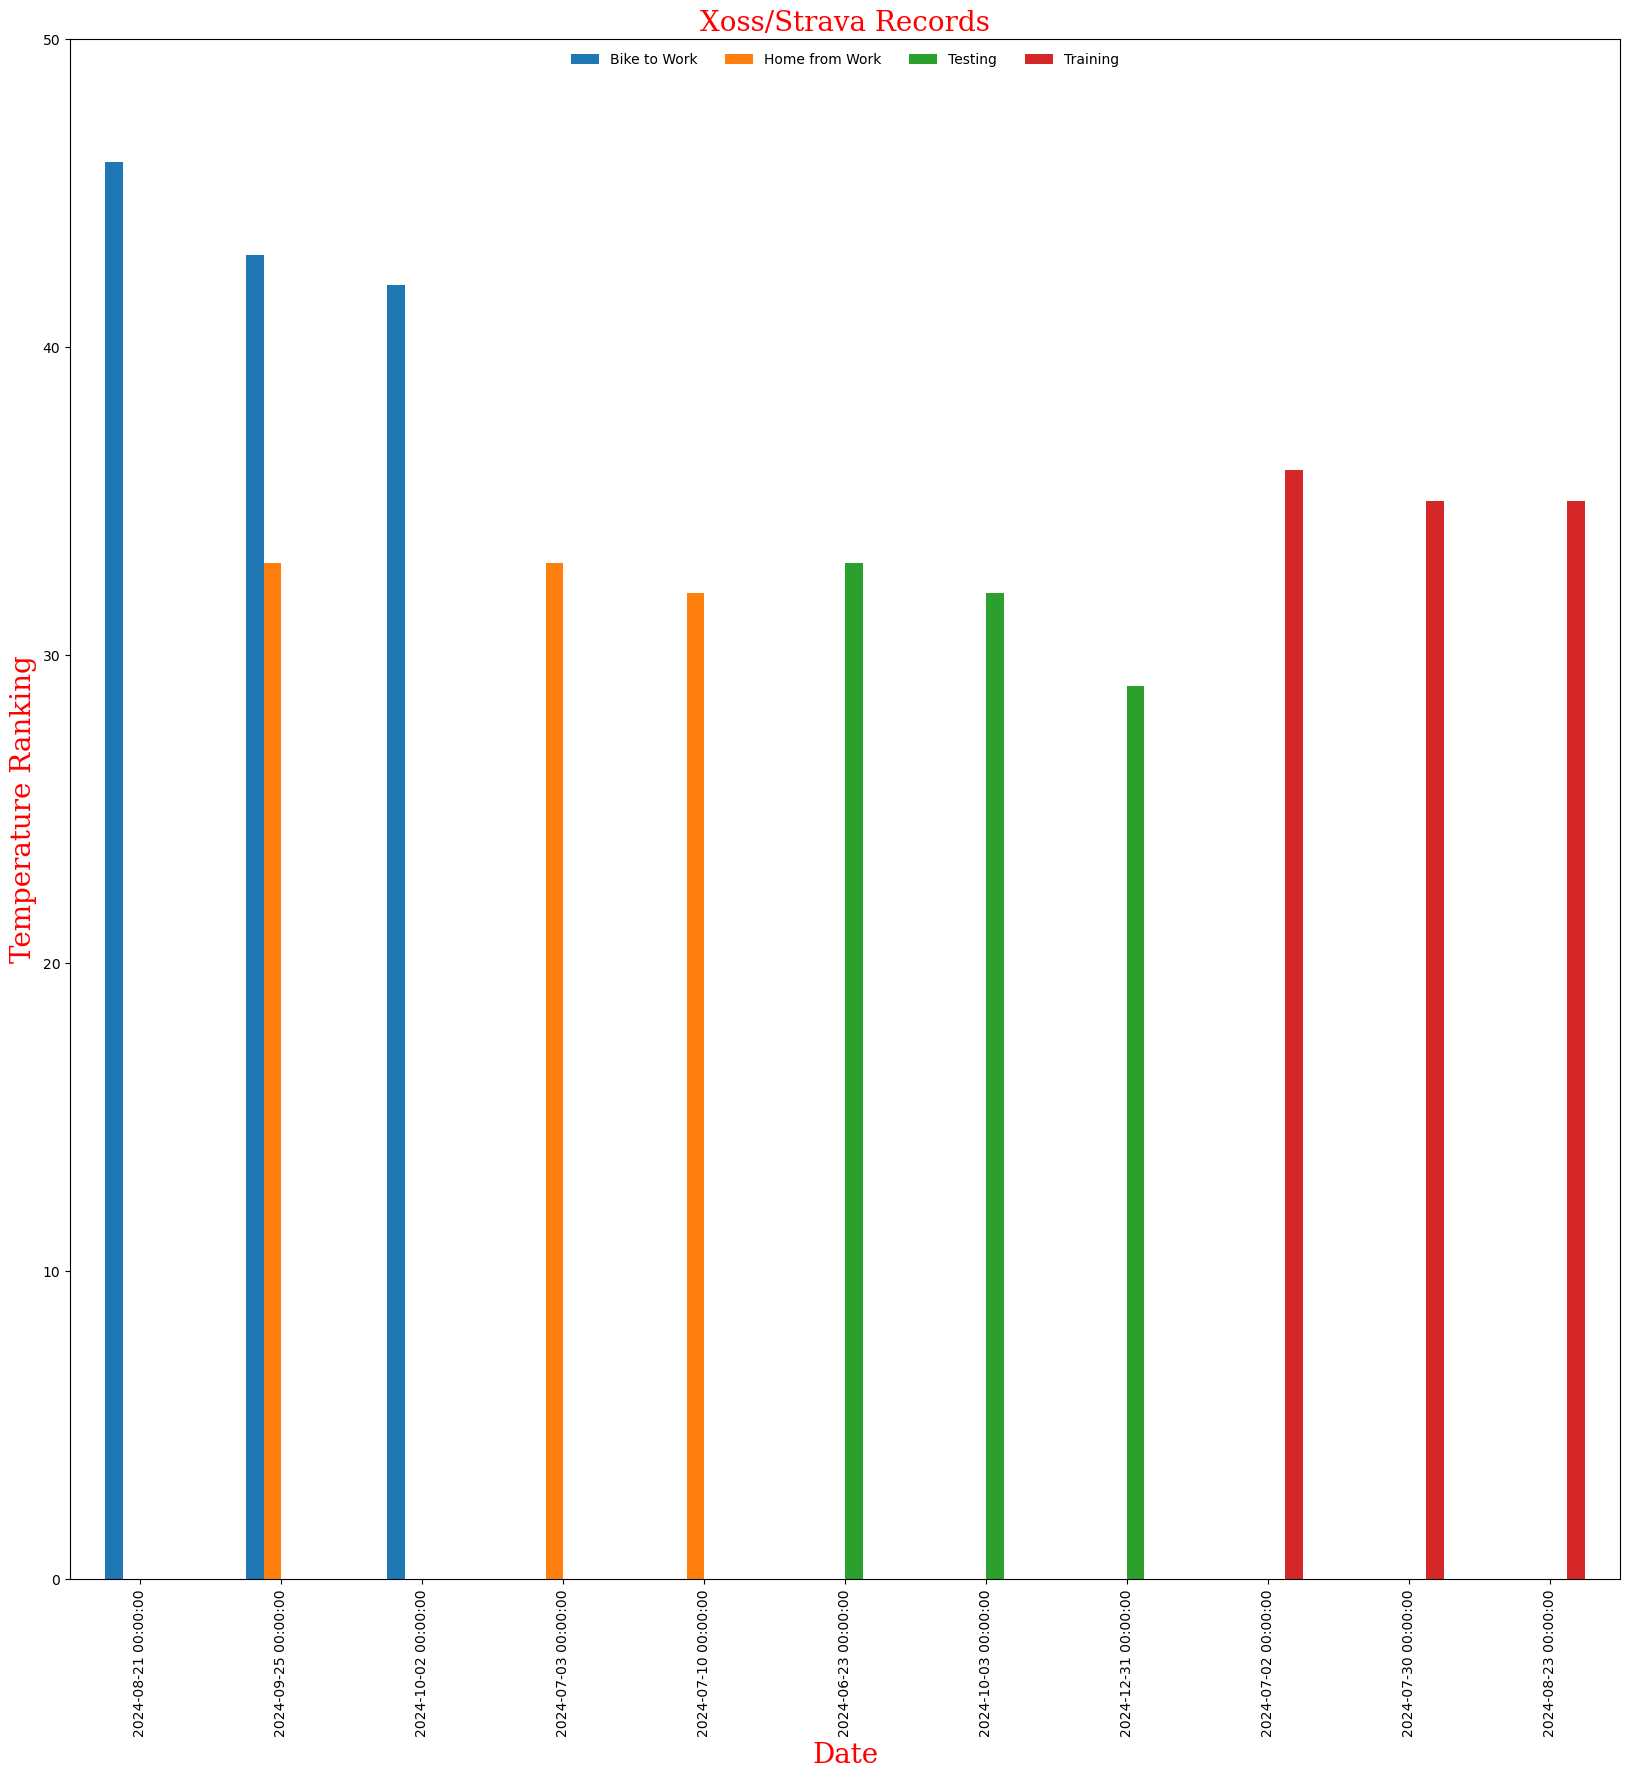

In [66]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
tetr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Testing", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=20)
plt.title('Xoss/Strava Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Temperature Ranking', fontdict=f1)
plt.ylim(0, 50)
plt.savefig("fig/tetr_xoss_strava.png")
plt.show()

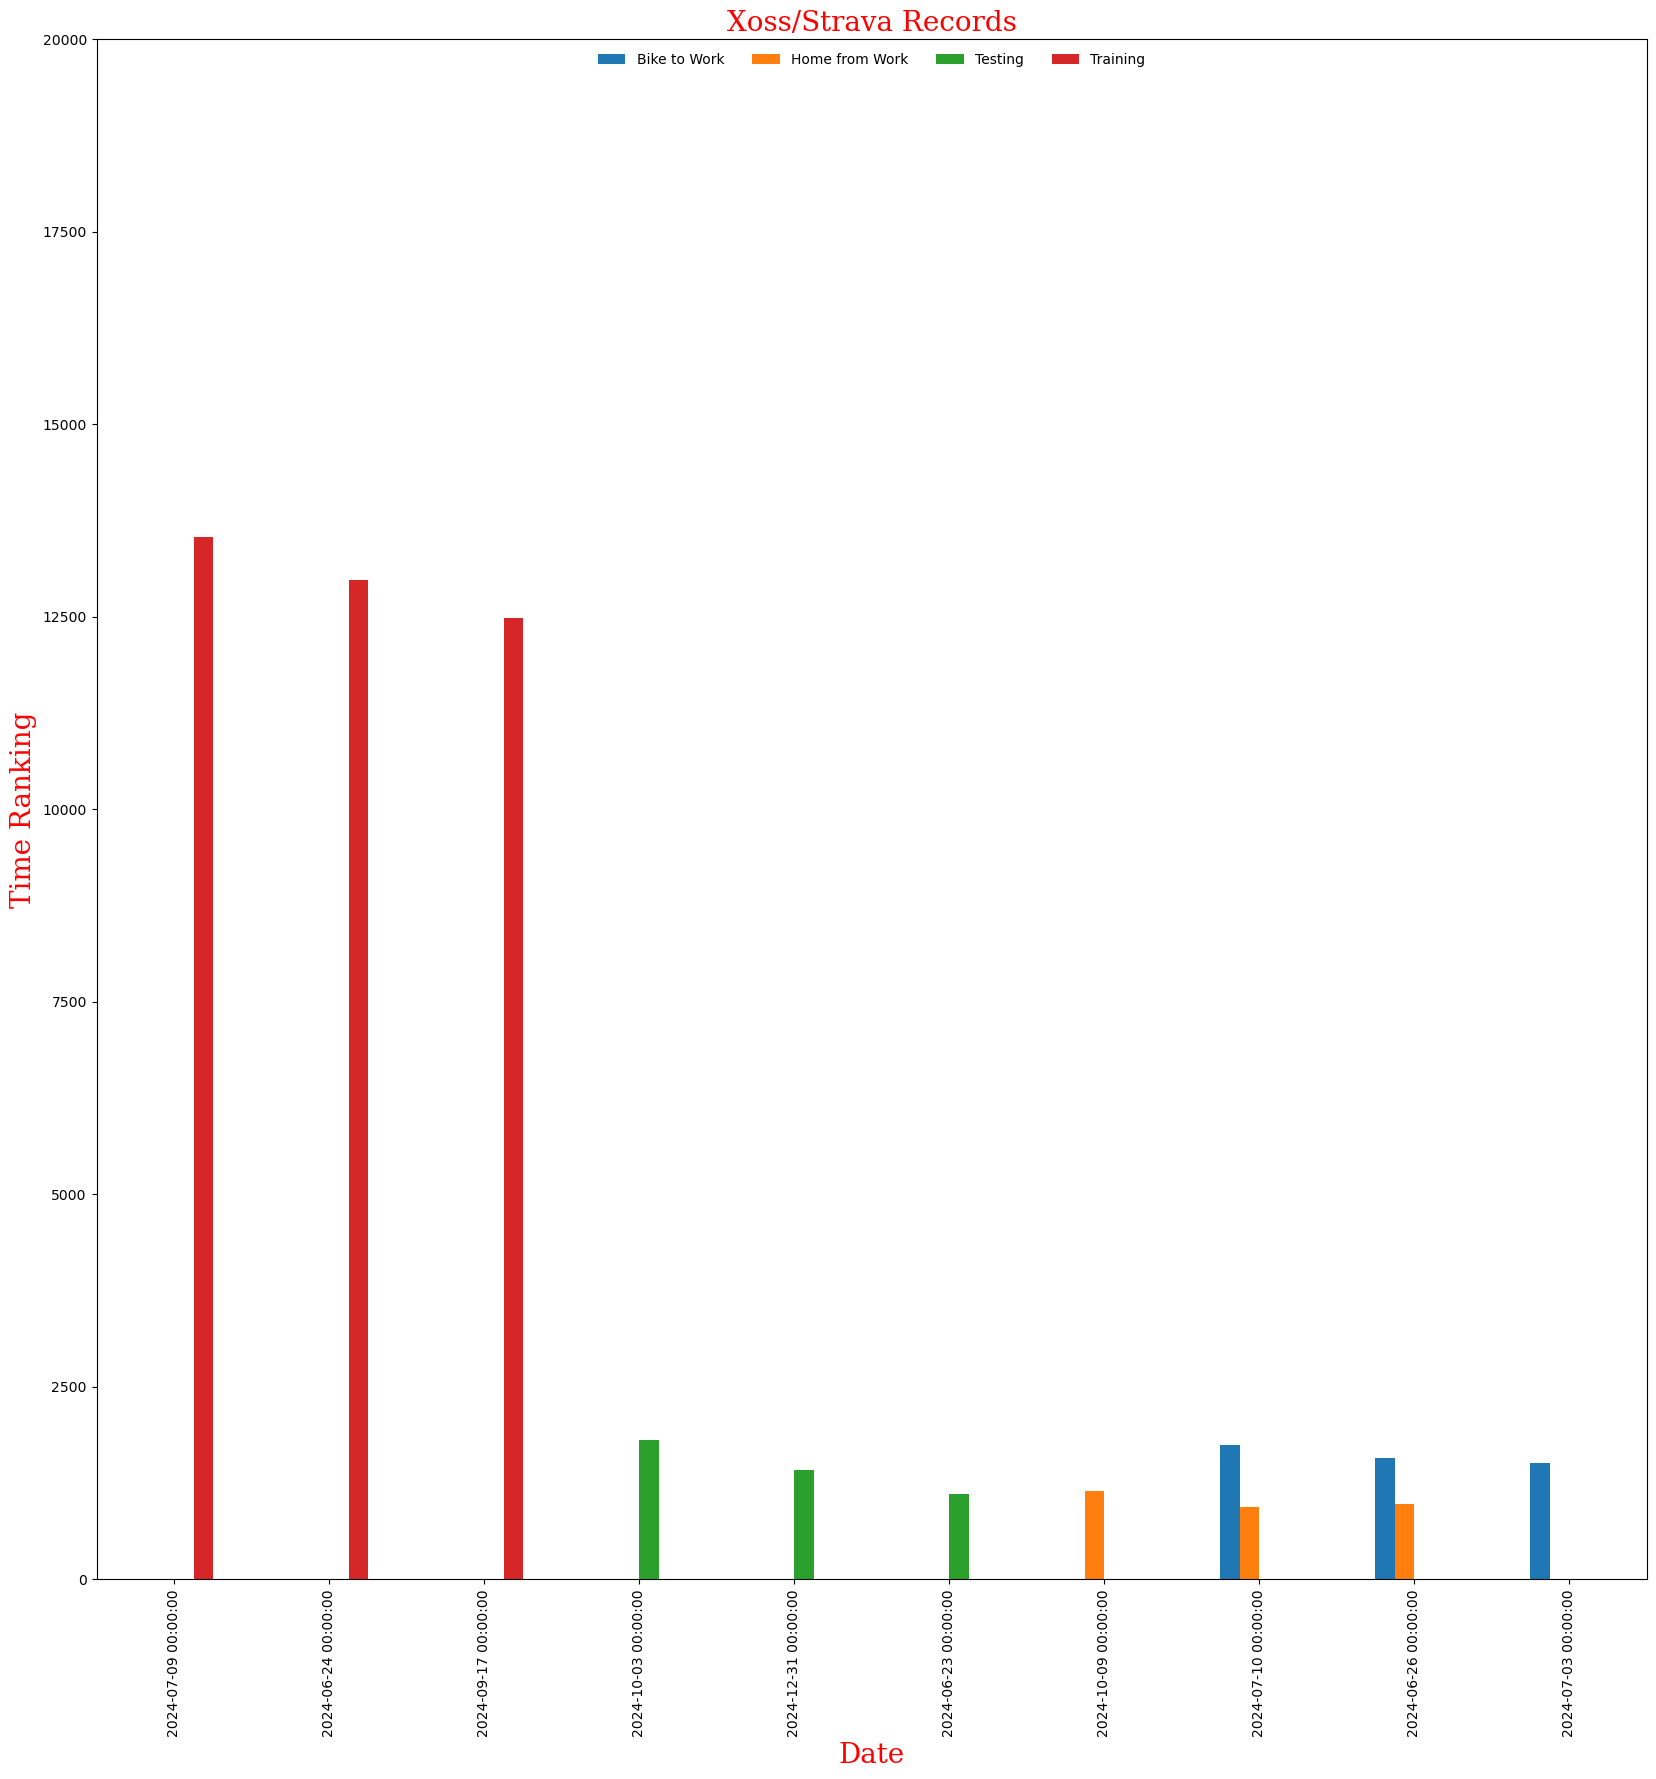

In [63]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
titr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Testing", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=20)
plt.title('Xoss/Strava Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Time Ranking', fontdict=f1)
plt.ylim(0, 20000)
plt.savefig("fig/titr_xoss_strava.png")
plt.show()

In [69]:
# Creating an HTML file 
Func = open("index.html","w") 
   
# Adding input data to the HTML file 
Func.write("<html>\n  <head>\n <title>\n  Xoss/Strava Records</title>\n   </head>\n  <table border='3' align='center' class='dataframe' style='text-align:left; width:1000px;'>\n   <h2 style='text-align:center;'>\n  Xoss/Strava Report Summary</h2>\n <thead>\n   <th colspan='18' style='text-align: center; padding:15px; font-size: 20px; background-color:#FFFF00'>General Information</th>\n    </thead>\n   <table border='3' align='center'class='dataframe' style='text-align:left; width:1000px;'>\n<thead>\n<tr style='text-align: center;'>\n<th colspan='3'>Total Records</th>\n<th colspan='3'>Files Loaded</th>\n<th colspan='3'>Category</th>\n<th colspan='3'>Unit</th>\n<th colspan='3'>Purpose</th>\n<th colspan='3'>Count</th>\n</tr>\n</thead>\n<tbody>\n<tr>\n<th colspan='3' rowspan='7' style='text-align: center; font-size: 100px; color:#ffff00; background-color: #454541'>33</th>\n<th colspan='3' rowspan='7' style='text-align: center; font-size: 100px; color:#ffff00; background-color: #454541'>21</th>\n<th colspan='3'>Average Speed [AS]</th>\n<td colspan='3'>kph</td>\n<th colspan='3'>Bike to Work [BtW]</th>\n<td colspan='3'>12</td>\n</tr>\n<tr>\n<th colspan='3'>Calories Burned [CB]</th>\n<td colspan='3'>kcal</td>\n<th colspan='3' rowspan='2'>Home from Work [HfW]</th>\n<td colspan='3' rowspan='2'>12</td>\n</tr>\n<tr>\n<th colspan='3'>Distance [Di]</th>\n<td colspan='3'>km</td>\n</tr>\n<tr>\n<th colspan='3'>Elevation [El]</th>\n<td colspan='3'>m</td>\n<th colspan='3' rowspan='2'>Testing [Te]</th>\n<td colspan='3' rowspan='2'>3</td>\n</tr>\n<tr>\n<th colspan='3'>Max Speed [MS]</th>\n<td colspan='3'>kph</td>\n</tr>\n<tr>\n<th colspan='3'>Temperature [Tm]</th>\n<td colspan='3'>Celsius</td>\n<th colspan='3' rowspan='2'>Training [Tr]</th>\n<td colspan='3' rowspan='2'>6</td>\n</tr>\n<tr>\n<th colspan='3'>Time [Ti]</th>\n<td colspan='3'>sec</td>\n</tr>\n</tbody>\n</table>\n<table border='3' align='center' class='dataframe' style='text-align:left; width:1000px;'>\n   <thead>\n   <th colspan='18' style='text-align: center; padding:15px; font-size: 20px; background-color:#FFFF00'>Statistics</th>\n    </thead>\n  <table border='3' align='center'class='dataframe' style='text-align:left; width:1000px;'>\n<thead>\n    <tr style='text-align: center;'>\n    <th rowspan='2'>Category</th>\n     <th colspan='4' style='text-align:center'>Min</th>\n      <th colspan='4' style='text-align:center'>Max</th>\n     <th rowspan='2'>Category</th>\n     <th rowspan='2'>Sum</th>\n    </tr>\n<tr>\n         <th>BtW</th>\n      <th>HfW</th>\n         <th>Te</th>\n<th>Tr</th>\n      <th>BtW</th>\n      <th>HfW</th>\n        <th>Te</th>\n        <th>Tr</th>\n    </tr>\n   </thead>\n  <tbody>\n    <tr>\n      <th>AS</th>\n      <td style='font-size: 20px; color:#d12d2d'>15.40</td>\n      <td style='font-size: 20px; color:#d12d2d'>13.50</td>\n          <td style='font-size: 20px; color:#d12d2d'>15.20</td>\n      <td style='font-size: 20px; color:#d12d2d'>16.10</td>\n      <td style='font-size: 20px; color:#68d12d'>18.00</td>\n      <td style='font-size: 20px; color:#68d12d'>16.80</td>\n          <td style='font-size: 20px; color:#68d12d'>22.00</td>\n    <td style='font-size: 20px; color:#68d12d'>19.80</td>\n    <th>CB</th>\n   <td style='font-size: 20px; color:#357dc6'>18069.00</td>\n    </tr>\n    <tr>\n      <th>CB</th>\n      <td style='font-size: 20px; color:#d12d2d'>174.00</td>\n      <td style='font-size: 20px; color:#d12d2d'>107.00</td>\n         <td style='font-size: 20px; color:#d12d2d'>201.00</td>\n      <td style='font-size: 20px; color:#d12d2d'>1559.00</td>\n      <td style='font-size: 20px; color:#68d12d'>449.00</td>\n      <td style='font-size: 20px; color:#68d12d'>273.00</td>\n       <td style='font-size: 20px; color:#68d12d'>225.00</td>\n    <td style='font-size: 20px; color:#68d12d'>2397.00</td>\n    <th rowspan='2'>Di</th>\n   <td rowspan='2' style='font-size: 20px; color:#357dc6'>646.99</td>\n      </tr>\n    <tr>\n      <th>Di</th>\n      <td style='font-size: 20px; color:#d12d2d'>6.50</td>\n     <td style='font-size: 20px; color:#d12d2d'>4.01</td>\n           <td style='font-size: 20px; color:#d12d2d'>6.72</td>\n      <td style='font-size: 20px; color:#d12d2d'>55.98</td>\n      <td style='font-size: 20px; color:#68d12d'>16.24</td>\n      <td style='font-size: 20px; color:#68d12d'>10.11</td>\n           <td style='font-size: 20px; color:#68d12d'>7.80</td>\n    <td style='font-size: 20px; color:#68d12d'>84.80</td>\n          </tr>\n    <tr>\n      <th>El</th>\n      <td style='font-size: 20px; color:#d12d2d'>30.00</td>\n      <td style='font-size: 20px; color:#d12d2d'>24.00</td>\n          <td style='font-size: 20px; color:#d12d2d'>17.00</td>\n      <td style='font-size: 20px; color:#d12d2d'>443.00</td>\n      <td style='font-size: 20px; color:#68d12d'>125.00</td>\n      <td style='font-size: 20px; color:#68d12d'>40.00</td>\n      <td style='font-size: 20px; color:#68d12d'>30.00</td>\n         <td style='font-size: 20px; color:#68d12d'>794.00</td>\n   <th rowspan='2'>El</th>\n   <td rowspan='2' style='font-size: 20px; color:#357dc6'>4950.00</td>\n      </tr>\n  <tr>\n      <th>MS</th>\n      <td style='font-size: 20px; color:#d12d2d'>28.70</td>\n      <td style='font-size: 20px; color:#d12d2d'>34.10</td>\n          <td style='font-size: 20px; color:#d12d2d'>33.30</td>\n      <td style='font-size: 20px; color:#d12d2d'>36.20</td>\n      <td style='font-size: 20px; color:#68d12d'>39.80</td>\n      <td style='font-size: 20px; color:#68d12d'>40.50</td>\n      <td style='font-size: 20px; color:#68d12d'>37.90</td>\n         <td style='font-size: 20px; color:#68d12d'>43.30</td>\n   </tr>\n  <tr>\n      <th>Tm</th>\n      <td style='font-size: 20px; color:#d12d2d'>31.00</td>\n      <td style='font-size: 20px; color:#d12d2d'>27.00</td>\n          <td style='font-size: 20px; color:#d12d2d'>29.00</td>\n      <td style='font-size: 20px; color:#d12d2d'>32.00</td>\n      <td style='font-size: 20px; color:#68d12d'>46.00</td>\n      <td style='font-size: 20px; color:#68d12d'>33.00</td>\n      <td style='font-size: 20px; color:#68d12d'>33.00</td>\n         <td style='font-size: 20px; color:#68d12d'>36.00</td>\n   <th rowspan='2'>Ti</th>\n   <td rowspan='2' style='font-size: 20px; color:#357dc6'>133739.00</td>\n         </tr>\n  <tr>\n      <th>Ti</th>\n      <td style='font-size: 20px; color:#d12d2d'>1504.00</td>\n      <td style='font-size: 20px; color:#d12d2d'>937.00</td>\n          <td style='font-size: 20px; color:#d12d2d'>1101.00</td>\n      <td style='font-size: 20px; color:#d12d2d'>12488.00</td>\n      <td style='font-size: 20px; color:#68d12d'>3297.00</td>\n      <td style='font-size: 20px; color:#68d12d'>2523.00</td>\n      <td style='font-size: 20px; color:#68d12d'>1812.00</td>\n         <td style='font-size: 20px; color:#68d12d'>17028.00</td>\n        </tr>\n  </tbody>\n</table><table border='3' align='center' class='dataframe' style='text-align:left; width:1000px;'>\n  <thead>\n    <tr>\n      <th colspan='8' style='text-align: center'>Ave</th>\n    </tr>\n    <tr>\n   <th>Purpose</th>\n      <th>AS</th>\n       <th>CB</th>\n          <th>Di</th>\n      <th>El</th>\n    <th>MS</th>\n    <th>Tm</th>\n        <th>Ti</th>\n    </tr>\n   </thead>\n  <tbody>\n      <tr>\n      <th>BtW</th>\n      <th>16.49</th>\n      <td>270.08</td>\n      <td>9.93</td>\n      <td>88.00</td>\n      <td>33.90</td>\n      <td>39.58</td>\n      <td>2168.17</td>\n      </tr>\n    <tr>\n      <th>HfW</th>\n      <th>14.88</th>\n      <td>168.33</td>\n          <td>6.16</td>\n      <td>34.75</td>\n    <td>37.22</td>\n    <td>31.00</td>\n    <td>1497.25</td>\n    </tr>\n    <tr>\n      <th>Te</th>\n      <th>19.03</th>\n          <td>213.67</td>\n      <td>7.39</td>\n      <td>22.00</td>\n    <td>35.70</td>\n    <td>31.33</td>\n    <td>1442.67</td>\n    </tr>\n  <tr>\n      <th>Tr</th>\n      <th>18.17</th>\n          <td>2027.83</td>\n      <td>71.96</td>\n      <td>568.50</td>\n    <td>41.27</td>\n    <td>34.17</td>\n    <td>14237.67</td>\n    </tr>\n  </tbody>\n</table><table border='3' align='center' class='dataframe' style='text-align:left; width:1000px;'>\n   <thead>\n   <th colspan='18' style='text-align: center; padding:15px; font-size: 20px; background-color:#FFFF00'>Graph Chart</th>\n    </thead>\n  <table border='3' align='center'class='dataframe' style='text-align:left; width:1000px;'>\n<thead>\n<tr style='text-align: center;'>\n<th colspan='3'><a href='fig/ast_xoss_strava.png' target='_blank'>AS</a></th>\n<th colspan='3'><a href='fig/cbt_xoss_strava.png' target='_blank'>CB</a></th>\n<th colspan='3'><a href='fig/dt_xoss_strava.png' target='_blank'>Di</a></th>\n<th colspan='3'><a href='fig/et_xoss_strava.png' target='_blank'>El</a></th>\n<th colspan='3'><a href='fig/mst_xoss_strava.png' target='_blank'>MS</a></th>\n<th colspan='3'><a href='fig/tet_xoss_strava.png' target='_blank'>Tm</a></th>\n<th colspan='3'><a href='fig/tit_xoss_strava.png' target='_blank'>Ti</a></th>\n</tr>\n<tr style='text-align: center;'>\n<th colspan='3'><a href='fig/astr_xoss_strava.png' target='_blank'>ASR</a></th>\n<th colspan='3'><a href='fig/cbtr_xoss_strava.png' target='_blank'>CBR</a></th>\n<th colspan='3'><a href='fig/dtr_xoss_strava.png' target='_blank'>DiR</a></th>\n<th colspan='3'><a href='fig/etr_xoss_strava.png' target='_blank'>ElR</a></th>\n<th colspan='3'><a href='fig/mstr_xoss_strava.png' target='_blank'>MSR</a></th>\n<th colspan='3'><a href='fig/tetr_xoss_strava.png' target='_blank'>TmR</a></th>\n<th colspan='3'><a href='fig/titr_xoss_strava.png' target='_blank'>TiR</a></th>\n</tr>\n</thead>\n<table border='3' align='center' class='dataframe' style='text-align:left; width:1000px;'>\n   <thead>\n   <th colspan='18' style='text-align: center; padding:15px; font-size: 20px; background-color:#FFFF00'>Rankings</th>\n    </thead>\n  <table border='3' align='center'class='dataframe' style='text-align:left; width:1000px;'>\n<thead>\n<tr style='text-align: center;'>\n<th rowspan='2'>Rank</th>\n<th colspan='7' style='background-color:#ffff00'>BtW</th>\n</tr>\n<tr style='text-align: center;'>\n<th>AS</th>\n<th>CB</th>\n<th>Di</th>\n<th>El</th>\n<th>MS</th>\n<th>Tm</th>\n<th>Ti</th>\n</tr>\n<tr style='text-align: center;'>\n<th style='font-size:20px; color:#ffff00; background-color: #454541'>1</th>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-06-26 (18.0)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-08-21 (449.0)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-08-21 (16.24)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-08-21 (125.0)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-08-14 (39.8)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-09-18 (31.0)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-07-03 (1504.0)</td>\n</tr>\n     <tr style='text-align: center;'>\n<th style='font-size:20px'>2</th>\n<td style='font-size:20px'>2024-08-21 (17.7)</td>\n<td style='font-size:20px'>2024-10-02 (332.0)</td>\n<td style='font-size:20px'>2024-10-02 (12.07)</td>\n<td style='font-size:20px'>2024-09-25 (103.0)</td>\n<td style='font-size:20px'>2024-07-17 (38.9)</td>\n<td style='font-size:20px'>2024-06-26	(34.0)</td>\n<td style='font-size:20px'>2024-06-26 (1568.0)</td>\n</tr>\n   <tr style='text-align: center;'>\n<th style='font-size:20px'>3</th>\n<td style='font-size:20px'>2024-07-17 (17.5)</td>\n<td style='font-size:20px'>2024-09-18 (296.0)</td>\n<td style='font-size:20px'>2024-09-18 (11.03)</td>\n<td style='font-size:20px'>2024-07-17 (100.0)</td>\n<td style='font-size:20px'>2024-08-21 (37.4)</td>\n<td style='font-size:20px'>2024-07-17 (36.0)</td>\n<td style='font-size:20px'>2024-07-10	(1736.0)</td>\n</tr>\n         <tr style='text-align: center;'>\n<th rowspan='2'>Rank</th>\n<th colspan='7' style='background-color:#ffff00'>HfW</th>\n</tr>\n<tr style='text-align: center;'>\n<th>AS</th>\n<th>CB</th>\n<th>Di</th>\n<th>El</th>\n<th>MS</th>\n<th>Tm</th>\n<th>Ti</th>\n</tr>\n<tr style='text-align: center;'>\n<th style='font-size:20px; color:#ffff00; background-color: #454541'>1</th>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-07-17 (16.8)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-09-25	(273.0)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-09-25	(10.11)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541' rowspan='2'>2024-08-07	& 2024-08-14 (40.0)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541' rowspan='2'>2024-08-07	& 2024-08-07 (40.5)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541' rowspan='2'>2024-09-25 & 2024-07-03 (33.0)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-07-10	(937.0)</td>\n</tr>\n     <tr style='text-align: center;'>\n<th style='font-size:20px'>2</th>\n<td style='font-size:20px' rowspan='2'>2024-07-10 & 2024-08-07 (15.7)</td>\n<td style='font-size:20px'>2024-10-02 (183.0)</td>\n<td style='font-size:20px'>2024-08-21	(6.55)</td>\n<td style='font-size:20px'>2024-06-26 (969.0)</td>\n</tr>\n   <tr style='text-align: center;'>\n<th style='font-size:20px'>3</th>\n<td style='font-size:20px'>2024-07-17 (181.0)</td>\n<td style='font-size:20px'>2024-09-18	(6.5)</td>\n<td style='font-size:20px'>2024-07-17 (39.0)</td>\n<td style='font-size:20px'>2024-08-21 (39.7)</td>\n<td style='font-size:20px'>2024-07-10 (32.0)</td>\n<td style='font-size:20px'>2024-10-09 (1149.0)</td>\n</tr>\n   <tr style='text-align: center;'>\n<th rowspan='2'>Rank</th>\n<th colspan='7' style='background-color:#ffff00'>Te</th>\n</tr>\n<tr style='text-align: center;'>\n<th>AS</th>\n<th>CB</th>\n<th>Di</th>\n<th>El</th>\n<th>MS</th>\n<th>Tm</th>\n<th>Ti</th>\n</tr>\n <tr style='text-align: center;'>\n<th style='font-size:20px; color:#ffff00; background-color: #454541'>1</th>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-06-23	(22.0)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-12-31 (225.0)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-12-31	(7.8)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-06-23 (30.0)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-06-23 (37.9)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-06-23 (33.0)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-06-23 (1101.0)</td>\n</tr>\n     <tr style='text-align: center;'>\n<th style='font-size:20px'>2</th>\n<td style='font-size:20px'>2024-12-31 (19.9)</td>\n<td style='font-size:20px'>2024-10-03 (215.0)</td>\n<td style='font-size:20px'>2024-10-03	(7.64)</td>\n<td style='font-size:20px'>2024-10-03 (19.0)</td>\n<td style='font-size:20px'>2024-10-03 (35.9)</td>\n<td style='font-size:20px'>2024-10-03 (32.0)</td>\n<td style='font-size:20px'>2024-12-31 (1415.0)</td>\n</tr>\n   <tr style='text-align: center;'>\n<th style='font-size:20px'>3</th>\n<td style='font-size:20px'>2024-10-03 (15.2)</td>\n<td style='font-size:20px'>2024-06-23 (201.0)</td>\n<td style='font-size:20px'>2024-06-23 (6.72)</td>\n<td style='font-size:20px'>2024-12-31 (17.0)</td>\n<td style='font-size:20px'>2024-12-31 (33.3)</td>\n<td style='font-size:20px'>2024-12-31 (29.0)</td>\n<td style='font-size:20px'>2024-10-03 (1812.0)</td>\n</tr>\n <tr style='text-align: center;'>\n<th rowspan='2'>Rank</th>\n<th colspan='7' style='background-color:#ffff00'>Tr</th>\n</tr>\n<tr style='text-align: center;'>\n<th>AS</th>\n<th>CB</th>\n<th>Di</th>\n<th>El</th>\n<th>MS</th>\n<th>Tm</th>\n<th>Ti</th>\n</tr>\n<tr style='text-align: center;'>\n<th style='font-size:20px; color:#ffff00; background-color: #454541'>1</th>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-08-23 (19.8)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-08-23 (2397.0)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-08-23 (84.8)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-09-17 (794.0)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-07-02 (43.3)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-07-02 (36.0)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-09-17 (12488.0)</td>\n</tr>\n     <tr style='text-align: center;'>\n<th style='font-size:20px'>2</th>\n<td style='font-size:20px'>2024-07-09 (19.4)</td>\n<td style='font-size:20px'>2024-07-30 (2261.0)</td>\n<td style='font-size:20px'>2024-07-30 (80.8)</td>\n<td style='font-size:20px'>2024-07-02 (633.0)</td>\n<td style='font-size:20px'>2024-07-09 (43.1)</td>\n<td style='font-size:20px' rowspan='2'>2024-07-30 & 2024-08-23 (35.0)</td>\n<td style='font-size:20px'>2024-06-24 (12972.0)</td>\n</tr>\n   <tr style='text-align: center;'>\n<th style='font-size:20px'>3</th>\n<td style='font-size:20px'>2024-07-02 (18.4)</td>\n<td style='font-size:20px'>2024-07-09 (2082.0)</td>\n<td style='font-size:20px'>2024-07-09 (73.11)</td>\n<td style='font-size:20px'>2024-08-23 (544.0)</td>\n<td style='font-size:20px'>2024-08-23 (42.5)</td>\n<td style='font-size:20px'>2024-07-09 (13539.0)</td>\n</tr>\n </thead>\n</table>\n</table>\n</html>")
              
# Saving the data into the HTML file 
Func.close()